<center>
    <h1>AE - 248 Project</h1>
    <h2>Group No. 18</h2>
</center>

<center><h1><b>Topic - Used-Vehicle Price Forecasting</b></h1></center><br>
<center><img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfkVfpscHSAGE-lyfgTmf-EyRUGIezGD-wmw&s="300"></center>

## Group Members

| Members Name    | Roll no.   |
|-----------------|------------|
| Arpit Jain      | 22b0078    |
| Ghoshank Nanhe  | 22b0073    |
| Rohan Kunchala  | 22b0037    |
| Medhavin Chabra | 22b0024    |
| Akshat Jain     | 22b2717    |
| Priyanshu Meena | 22b0060    |

## Context
    
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
The Indian used car market is booming, with sales exceeding new car sales in recent years. This shift highlights a crucial difference: unlike the controlled pricing and supply of new cars, the used car market is characterized by significant uncertainty in both aspects. This uncertainty presents a challenge for businesses operating in this space, making accurate used car price prediction crucial for success.

This project aims to leverage data analysis and linear regression to develop a robust used vehicle price forecasting model.<br>
This data analysis will utilize linear regression, a powerful statistical technique, to identify the relationships between various factors and the final selling price of used cars. By building a reliable price prediction model, we can:

 Empower businesses: Businesses can leverage this model to set competitive and profitable prices for used cars, maximizing their margins.
 Inform consumers: Buyers can utilize the model to estimate the fair market value of used cars, making informed purchase decisions.
 Optimize market dynamics: Accurate price predictions can contribute to a more efficient and transparent used car market in India.

In conclusion, this data analysis project, employing linear regression, aims to create a valuable tool for navigating the dynamic Indian used car market. By accurately predicting used car prices, we can empower businesses, inform consumers, and contribute to a more stable and efficient market environment.
.</p>

<!-- <p style = "font-size : 20px ; color: black;font-family:TimesNewRoman">
    <b>Table of Contents</b>
</p><br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
- [Data Set](#Data-Set)

-  [Problem](#Problem)

- [Libraries](#Libraries)

- [Read and Understand Data](#Read-and-Understand-data)

- [Data Preprocessing](#Data-Preprocessing)
    
- [Basic EDA](#EDA)    
    
- [Handling Missing Value](#Handling-missing-values)
    
- [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
    
- [Insights based on EDA](#Insights-based-on-EDA)
  
- [Model Building](#Model-Building)
    
- [Test Assumptions](#Test-Assumptions) 
    
- [Recommendation](#Recommendation)

<br>
 -->

<h2>Info About Data Set</h2>

<h4> We sourced our used car data from a publicly available dataset on Kaggle</h4><br>
<p style = "font-size : 15px ">
    
1. S.No.	Serial number assigned to each car<br><br>
2. Name	Make and model of the car<br><br>
3. Location	City where the car is being sold<br><br>
4. Year	Year of car's manufacture<br><br>
5. Kilometers_driven	Total distance driven by the car in kilometers<br><br>
5. Fuel_Type	Type of fuel the car uses (Petrol, Diesel, Electric, CNG, LPG)<br><br>
6. Transmission	Type of transmission (Automatic, Manual)<br><br>
7. Owner	Number of previous owners the car has had<br><br>
8. Mileage	Standard fuel efficiency of the car model (in kmpl or km/kg)<br><br>
9. Engine	Engine displacement volume in cubic centimeters (cc)<br><br>
10. Power	Maximum engine power in brake horsepower (bhp)<br><br>
11. Seats	Number of seats in the car<br><br>
12. New_Price	Price of a new car of the same model in lakh rupees (INR)<br><br>
13. Price	Selling price of the used car in lakh rupees (INR)<br><br>
</p>

<h2>Works
</h2><br>
<p style="font-size: 15px">

- Data Cleaning Process and Pre-processing<br><br>
- Exploratory data analysis<br><br>
- Plots defining relationships between various parameters in our dataset.<br><br>
- Multivariable analysis<br><br>
- Distribution of car prices in different regions<br><br>
- Using Linear Regression for Used Vehicle Price Estimation<br><br>
- Hypothesis Testing<br><br>
</p>

<h2>Libraries</h2>

In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import math


%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore')

# Read and Understand data

In [2]:
path_of_data='./used_cars_data.csv'
dataframe=pd.read_csv(path_of_data,index_col=0)
cars=dataframe.copy()

In [3]:
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7 kmpl,1198 CC,88.8 bhp,5.00000,NaN,1.99000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


<h1>Data Cleaning Process and Pre-processing -</h1>

In [4]:
print ("Features : \n\n", cars.columns.tolist())
print ("\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print ("\nUnique values :  \n\n", cars.nunique())

Features : 

 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

Missing values :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

Unique values :  

 Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<h1><b>Observations</b></h1><br>
This information shows that some columns have a lot of missing values.

-  New_Price has only 1006 values. 86 % values are missing

-  Price, which is a Target variable 17 % missing values.This needs to be analysed further.

-  Seats has only 53 values missing and number of seats can be one of key factor in deciding price.
-  Powe and Engine has 46 missing values.

-  Mileage only has two values missing.

-  Mileage,Power,Engine,New_Price we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [6]:
# Now we are making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
Seats
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: count, dtype: int64
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: count, dtype: int64
Owner_Type
First             5952
Second            1152
Third              137

<h1><b>Observations</b></h1>

 - Maximum car being sold have fuel type as Diesel.
 - Mumbai has highest numbers of car availabe for purchase.
 - 5204 cars with Manual transmission are available for purchase.
 - Most of the cars are 5 seaters and First owned.
 - Years of car ranges form 1996- 2015

<h2>Processing Engine, Power , Mileage columns</h2>

Datatype for Engine ,Power and Mileage  are object because of unit assigned ,so striping  units.

In [7]:
typeoffuel=['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00000,NaN,2.35000
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,3.25000
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,NaN,1.40000
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00000,NaN,4.70000
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.00000,NaN,2.10000
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.00000,NaN,1.90000
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00000,NaN,2.85000
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00000,NaN,1.45000


### Mileage

In [8]:
cars[cars.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58 Lakh,13.00000
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,NaN,12.75000


In [9]:
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")


### Engine 

In [10]:
#remove units
cars["Engine"] = cars["Engine"].str.rstrip(" CC")


### Power

In [11]:
#remove bhp and replace null with nan
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)


In [12]:
#verify the data
num=['Engine','Power','Mileage']
cars[num].sample(15)

,Engine,Power,Mileage
S.No.,,,
2218,2982,168.5,13.0
1246,2967,241.4,13.22
2856,936,56.3,25.44
5188,1582,126.2,22.0
2040,1796,185,12.3
1631,1995,190,17.05
372,1248,88.5,24.3
3381,1248,88.5,24.3
2409,1995,170,13.2


I had seen some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage. Will check once again after converting datatype

In [13]:
cars.query("Power == '0.0'")['Power'].count()


0

In [14]:
cars.query("Mileage == '0.0'")['Mileage'].count()


81

Converting this observations to Nan so we will remember to handle them when handling missing values.

In [15]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan

In [16]:
cars.loc[cars["Engine"]=='0.0','Engine'].count()

0

In [17]:
cars[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [18]:
cars[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

There are 46 missing values in Engine, 175 in  Power,83 in Mileage. 

###  Processing Seats

In [19]:
cars.query("Seats == 0.0")['Seats']

S.No.
3999   0.00000
Name: Seats, dtype: float64

In [20]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
cars.loc[3999,'Seats'] =np.nan

<h2>Processing  New Price</h2> <br>
We know that New_Price is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.


In [21]:
import re

new_price_num = []

regex_power = "^\d+(\.\d+)? Lakh$"

for observation in dataframe["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:

            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
       
        new_price_num.append(np.nan)

The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.58 Cr
The data needs furthur processing.mismatch  3.75 Cr
The data needs fur

In [22]:
new_price_num = []

for observation in dataframe["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
         
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
     
        new_price_num.append(np.nan)


cars["new_price_num"] = new_price_num
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7,1198,88.8,5.00000,NaN,1.99000,NaN
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00000,NaN,6.00000,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00000,NaN,17.74000,NaN


<h3>Converting datatype</h3>

In [23]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [24]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000


### Processing Years to Derive Age of car
Since year has 2014, 1996  etc. But this will not help to understand how old cars is and its effect on  price.
so creating  two new columns current year and Age . Current year would be 2024 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns


In [25]:
cars['Current_year']=2024
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,9
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.70000,1198.00000,88.80000,5.00000,NaN,1.99000,NaN,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,11


### Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [26]:
cars = cars.dropna(subset=['Name'])
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [27]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.70000,2179.00000,187.70000,5.00000,NaN,53.83000,NaN,7,Land,RoverRange
6779,Mini Cooper 3 DOOR D,Mumbai,2015,20000,Diesel,Automatic,First,20.70000,1496.00000,113.98000,4.00000,35 Lakh,NaN,35.00000,9,Mini,Cooper3
365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.80000,1998.00000,192.00000,5.00000,44.59 Lakh,35.00000,44.59000,7,Mini,ClubmanCooper
1513,Land Rover Range Rover 2.2L Pure,Bangalore,2014,56000,Diesel,Automatic,First,12.70000,2179.00000,187.70000,5.00000,NaN,34.50000,NaN,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.00000,115.00000,5.00000,NaN,17.50000,NaN,12,Land,RoverFreelander


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7253 non-null   int64   
 15  Brand              7253 non-null   object  
 16  Model      

In [29]:
#changing brandnames
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'

In [30]:
cars.Brand.nunique()

32

In [31]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [32]:
cars.Model.isnull().sum()

1

In [33]:
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [34]:
cars.Model.nunique()

726

In [35]:
cars.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

<h2>Exploratory Data Analysis (EDA)</h2><br>
It is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   object  
 16  Model      

In [37]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,7252.00000,7252.00000,7169.00000,7206.00000,7077.00000,7198.00000,6019.00000,1006.00000,7252.00000
mean,2013.36652,58700.26269,18.34711,1616.60505,112.76871,5.28049,9.47947,22.77969,10.63348
std,3.25316,84433.48037,4.15791,595.32041,53.49652,0.80938,11.18792,27.75934,3.25316
min,1996.00000,171.00000,6.40000,72.00000,34.20000,2.00000,0.44000,3.91000,5.00000
25%,2011.00000,34000.00000,15.30000,1198.00000,75.00000,5.00000,3.50000,7.88500,8.00000
50%,2014.00000,53429.00000,18.20000,1493.00000,94.00000,5.00000,5.64000,11.57000,10.00000
75%,2016.00000,73000.00000,21.10000,1968.00000,138.10000,5.00000,9.95000,26.04250,13.00000
max,2019.00000,6500000.00000,33.54000,5998.00000,616.00000,10.00000,160.00000,375.00000,28.00000


<h2><b>Observations</b></h2>

    
- Years is left skewed. Years ranges from 1996- 2019 . Age of cars 5 year old to 28 years old

- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. 
- This is very high , and seems to be outlier. Need to analyze further.

- Mileage is almost Normally distrubuited

- Engine is right skewed and has outliers on higher  and lower end

- Power and Price are also right skewed.

- Price 160 Lakh is too much for a used car. Seems to be an outlier.

# Handling missing values

In [38]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

### Calculating missing values in each row

In [39]:
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
Name: count, dtype: int64

In [40]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')


For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64




For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64




For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64




For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64




For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31
dtype: int64




For the rows with exactly 6 missing values, NAs are found in:
Mileage          11
Engine           20
Power            20
Seats           

This confirms that certain columns tend to be missing together or all nonmissing together. So will try to fill the missing values , as much as possible.

In [41]:
cars[num_missing==7]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Mahindra,TUV300


In [42]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

We can start filling missing values by grouping  name and year and fill in missing values. with median.

In [43]:
cars.groupby(['Name','Year'])['Engine'].median().head(20)

Name                                        Year
Ambassador Classic Nova Diesel              2003   1489.00000
Audi A3 35 TDI Attraction                   2014   1968.00000
Audi A3 35 TDI Premium                      2016   1968.00000
Audi A3 35 TDI Premium Plus                 2015   1968.00000
                                            2016   1968.00000
Audi A3 35 TDI Technology                   2017   1968.00000
Audi A4 1.8 TFSI                            2010   1781.00000
                                            2011   1781.00000
Audi A4 1.8 TFSI Technology Edition         2012   1798.00000
Audi A4 2.0 TDI                             2009   1968.00000
                                            2011   1968.00000
                                            2012   1968.00000
                                            2013   1968.00000
                                            2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus        2013   1968.00000
                     

In [44]:
cars['Engine'] = cars.groupby(['Name', 'Year'])['Engine'].transform(lambda x: x.fillna(x.median()))
cars['Power'] = cars.groupby(['Name', 'Year'])['Power'].transform(lambda x: x.fillna(x.median()))
cars['Mileage'] = cars.groupby(['Name', 'Year'])['Mileage'].transform(lambda x: x.fillna(x.median()))

In [45]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      45
Power      162
Mileage     82
dtype: int64

In [46]:
cars.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

As we can see most of the model have same engine 
size and instead  of just applying median , grouping with model and year that should give me more granularity, and near to accurate Engine values.


In [47]:
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].transform(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Brand','Model'])['Power'].transform(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Brand','Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [48]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

 There are still missing values , analyzing further .Grouping by only Model for Engine and then filling missing values with median. For  Power and Mileage Engine values for a Brand can be used to get more accurate value.

In [49]:
cars.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending=True).head(10)

max     median       mean
Model   Year                                 
1000AC  1998  970.00000  970.00000  970.00000
1Series 2013 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
370ZAT  2012 3696.00000 3696.00000 3696.00000
3Series 2018 1995.00000 1995.00000 1995.00000
        2017 1995.00000 1995.00000 1995.00000
        2016 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
        2014 2993.00000 1995.00000 2078.16667
        2013 2993.00000 1995.00000 2066.42857

In [50]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

max    median      mean
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 187.74000 187.74000 181.03333
           1968.00000 187.74000 174.33000 167.12318
           1984.00000 226.60000 207.90000 196.02200
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 246.70000 241.40000 241.74000

In [51]:
cars['Seats'].isnull().sum()

54

Grouping with Name should give me more granularity, and near to accurate Seat values.

In [52]:
cars['Seats']=cars.groupby(['Name'])['Seats'].transform(lambda x:x.fillna(x.median()))

In [53]:
cars['Seats'].isnull().sum()

47

Grouping with Model should give me more granularity, and near to accurate Seat values.

In [54]:
cars['Seats']=cars.groupby(['Model'])['Seats'].transform(lambda x:x.fillna(x.median()))

In [55]:
cars['Seats'].isnull().sum()

23

 Lets check which car types have missing values.

In [56]:
cars[cars['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,2.11000,NaN,14,Maruti,Swift1.3
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,18,Maruti,Swift1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,5.80000,NaN,9,Maruti,Swift1.3
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,3.15000,NaN,13,Maruti,Swift1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,4.70000,NaN,9,Maruti,Swift1.3
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,17,Maruti,Swift1.3
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50000,1061.00000,NaN,NaN,NaN,1.50000,NaN,16,Maruti,EstiloLXI
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,4.24000,NaN,10,Maruti,Swift1.3
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.10000,NaN,NaN,NaN,NaN,2.35000,NaN,18,Maruti,Swift1.3


In [57]:
cars['Seats']=cars['Seats'].fillna(5)

In [58]:
cars['Seats'].isnull().sum()

0

Need to analyse along with price if seats plays any role in price

In [59]:
cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7220 non-null   float64 
 8   Engine             7234 non-null   float64 
 9   Power              7189 non-null   float64 
 10  Seats              7252 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   category
 16  Model      

# Processing New Price

In [61]:
cars['new_price_num']=cars.groupby(['Name','Year'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [62]:
cars.new_price_num.isnull().sum()

6138

In [63]:
cars['new_price_num']=cars.groupby(['Name'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [64]:
cars.new_price_num.isnull().sum()

6019

In [65]:
cars['new_price_num']=cars.groupby(['Brand','Model'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [66]:
cars.new_price_num.isnull().sum()

4578

In [67]:
cars['new_price_num']=cars.groupby(['Brand'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [68]:
cars.drop(['New_Price'],axis=1,inplace=True)

In [69]:
cars.new_price_num.isnull().sum()

158

In [70]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Land Rover      139.00000
Porsche         136.00000
BMW              55.07000
Jaguar           53.72000
Audi             53.14000
Mercedes-Benz    49.49000
Volvo            45.67000
Mini Cooper      42.30000
Isuzu            33.68000
Mitsubishi       33.21000
Jeep             22.95000
Toyota           21.08500
Nissan           15.06000
Skoda            14.92250
Ford             11.47500
Renault          11.27000
Volkswagen       10.94000
Mahindra         10.90000
Honda             8.92000
Fiat              8.62500
Hyundai           8.23000
Tata              7.70000
Maruti            7.00000
Datsun            4.98000
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [71]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
Price                1233
new_price_num         158
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [72]:

cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [73]:
cars.dropna(inplace=True,axis=0)

In [74]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [75]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,1.75000,5.29000,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,12.50000,16.06000,9,Hyundai,Creta1.6
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.70000,1198.00000,88.80000,5.00000,1.99000,8.92000,14,Honda,JazzSelect
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,6.00000,11.27000,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,17.74000,53.14000,11,Audi,A4New


In [76]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [77]:
dataframe.shape 

(7253, 13)

Finally done with all missing  values handling

<h2> Calculating Mean, Median and Maximum Values of Each Column For every brand</h2>

In [78]:
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,max,median,mean
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,72.94000,23.50000,25.53771
BMW,93.67000,21.00000,25.24315
Bentley,59.00000,59.00000,59.00000
Chevrolet,NaN,NaN,NaN
Datsun,3.95000,3.10000,3.04923
Fiat,7.71000,2.60000,3.26929
Force,NaN,NaN,NaN
Ford,56.80000,5.34500,6.88940


<h1>Multivariable Analysis</h1>

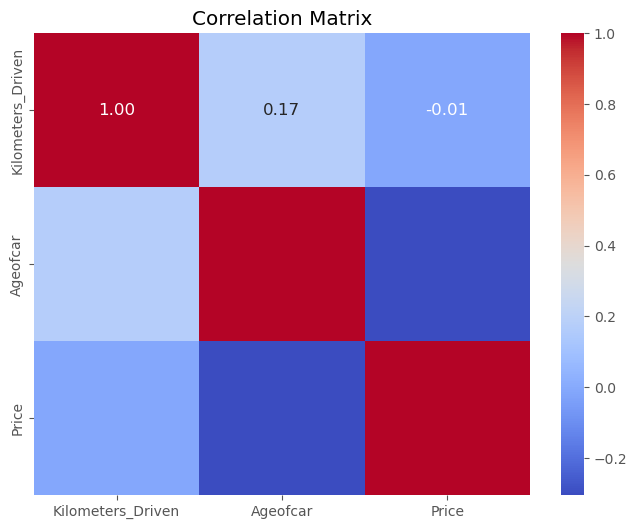

In [79]:
# Calculate correlations
correlation_matrix = cars[['Kilometers_Driven', 'Ageofcar', 'Price']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()

<h3>Interpretation of correlation results -</h3><br>

<p style="font-size: 20px">The correlation matrix indicates that the price of the car is negatively correlated with its age <br>(correlation coefficient: -0.3), suggesting that older cars tend to have lower prices. Conversely, the correlation between price and kilometers driven is negligible (correlation coefficient: -0.01).<br><br> This discrepancy highlights a scaling issue, where the impact of kilometers driven on price is significant but not visually apparent without proper scaling.</p>


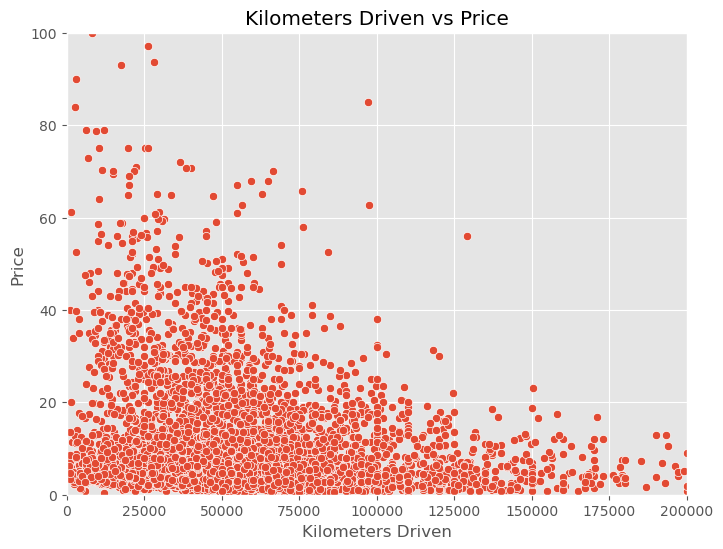

In [80]:
# Scatter plot for Kilometers_Driven vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=cars)
plt.title('Kilometers Driven vs Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.xlim(0, 200000)
plt.ylim(0, 100)
plt.show()

<h3>Interpretation of Kilometers Driven vs Price scatter plot - </h3><br>

<p style="font-size: 20px">The scatter plot reveals that price is indeed influenced by the number of kilometers driven, although this relationship becomes clearer when scaling the axes appropriately.<br><br> For instance, each centimeter on the plot's axis might represent thousands of kilometers, making the influence of kilometers on price more perceptible.</p>

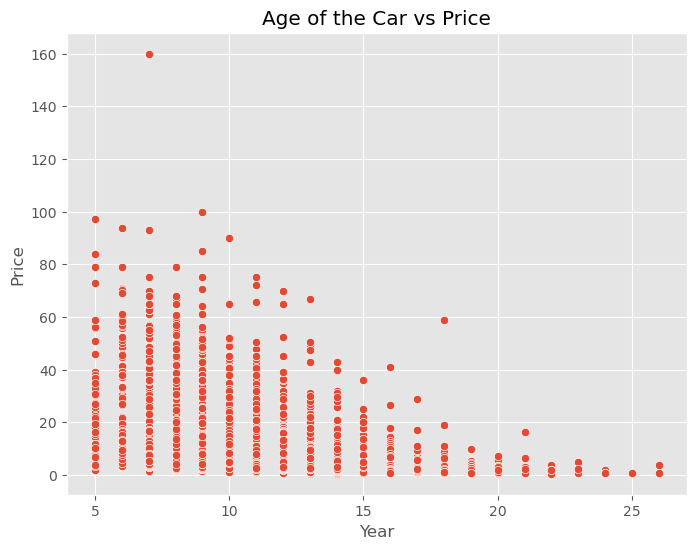

In [81]:
# Scatter plot for Age of the car vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ageofcar', y='Price', data=cars)
plt.title('Age of the Car vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

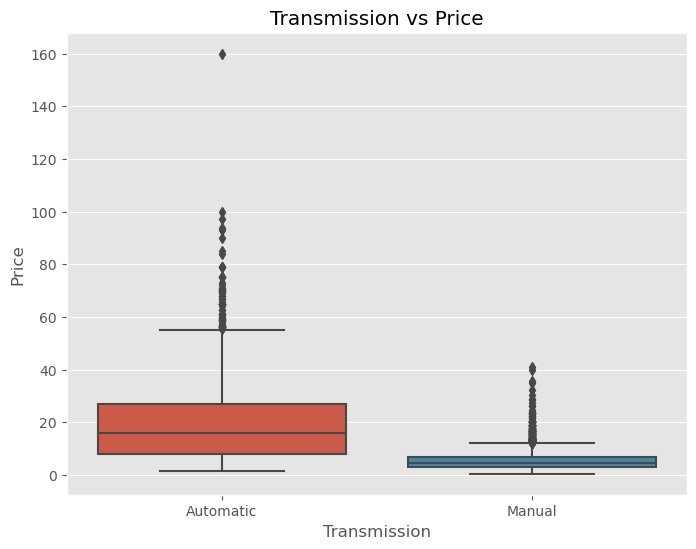

In [82]:
# Box plot for Transmission vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price', data=cars)
plt.title('Transmission vs Price')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

<h3>Interpretation of Transmission vs Price box plot - </h3>
<p style="font-size: 20px">The box plot illustrates a significant difference in price based on transmission type.<br> <br>Automatic cars generally command higher prices compared to manual ones, as indicated by the distribution of prices within each category.</p>

<h1>Graphs</h1>
<h2>Violin Plot for Price</h2>

<h2>Violin Plot for kilometers driven</h2>

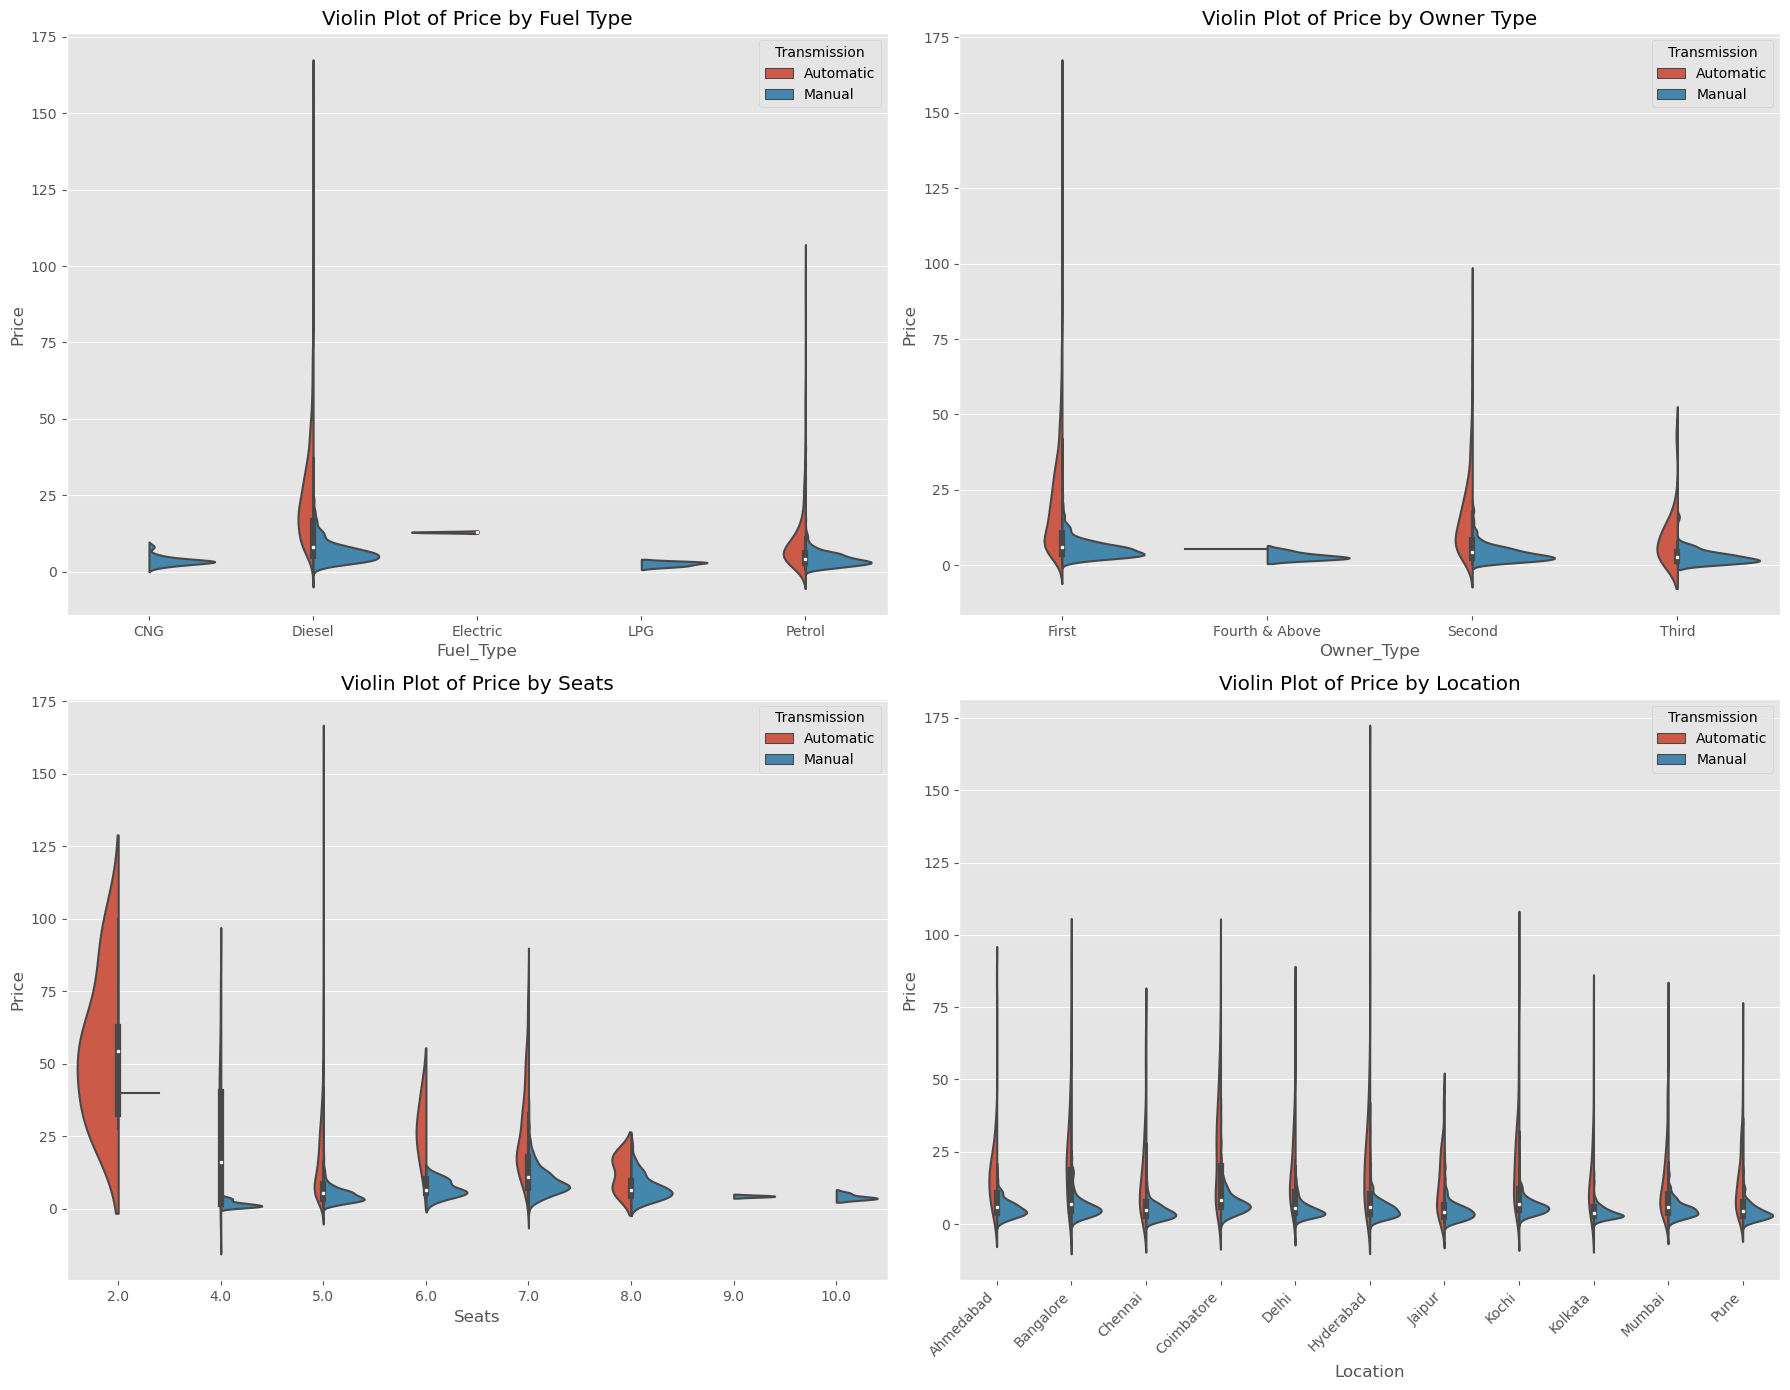

In [83]:
plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
sns.violinplot(data=cars, x="Fuel_Type", y="Price", hue="Transmission", split=True)
plt.title('Violin Plot of Price by Fuel Type')

plt.subplot(2, 2, 2)
sns.violinplot(data=cars, x="Owner_Type", y="Price", hue="Transmission", split=True)
plt.title('Violin Plot of Price by Owner Type')

plt.subplot(2, 2, 3)
sns.violinplot(data=cars, x="Seats", y="Price", hue="Transmission", split=True)
plt.title('Violin Plot of Price by Seats')

plt.subplot(2, 2, 4)
sns.violinplot(data=cars, x="Location", y="Price", hue="Transmission", split=True)
plt.title('Violin Plot of Price by Location')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


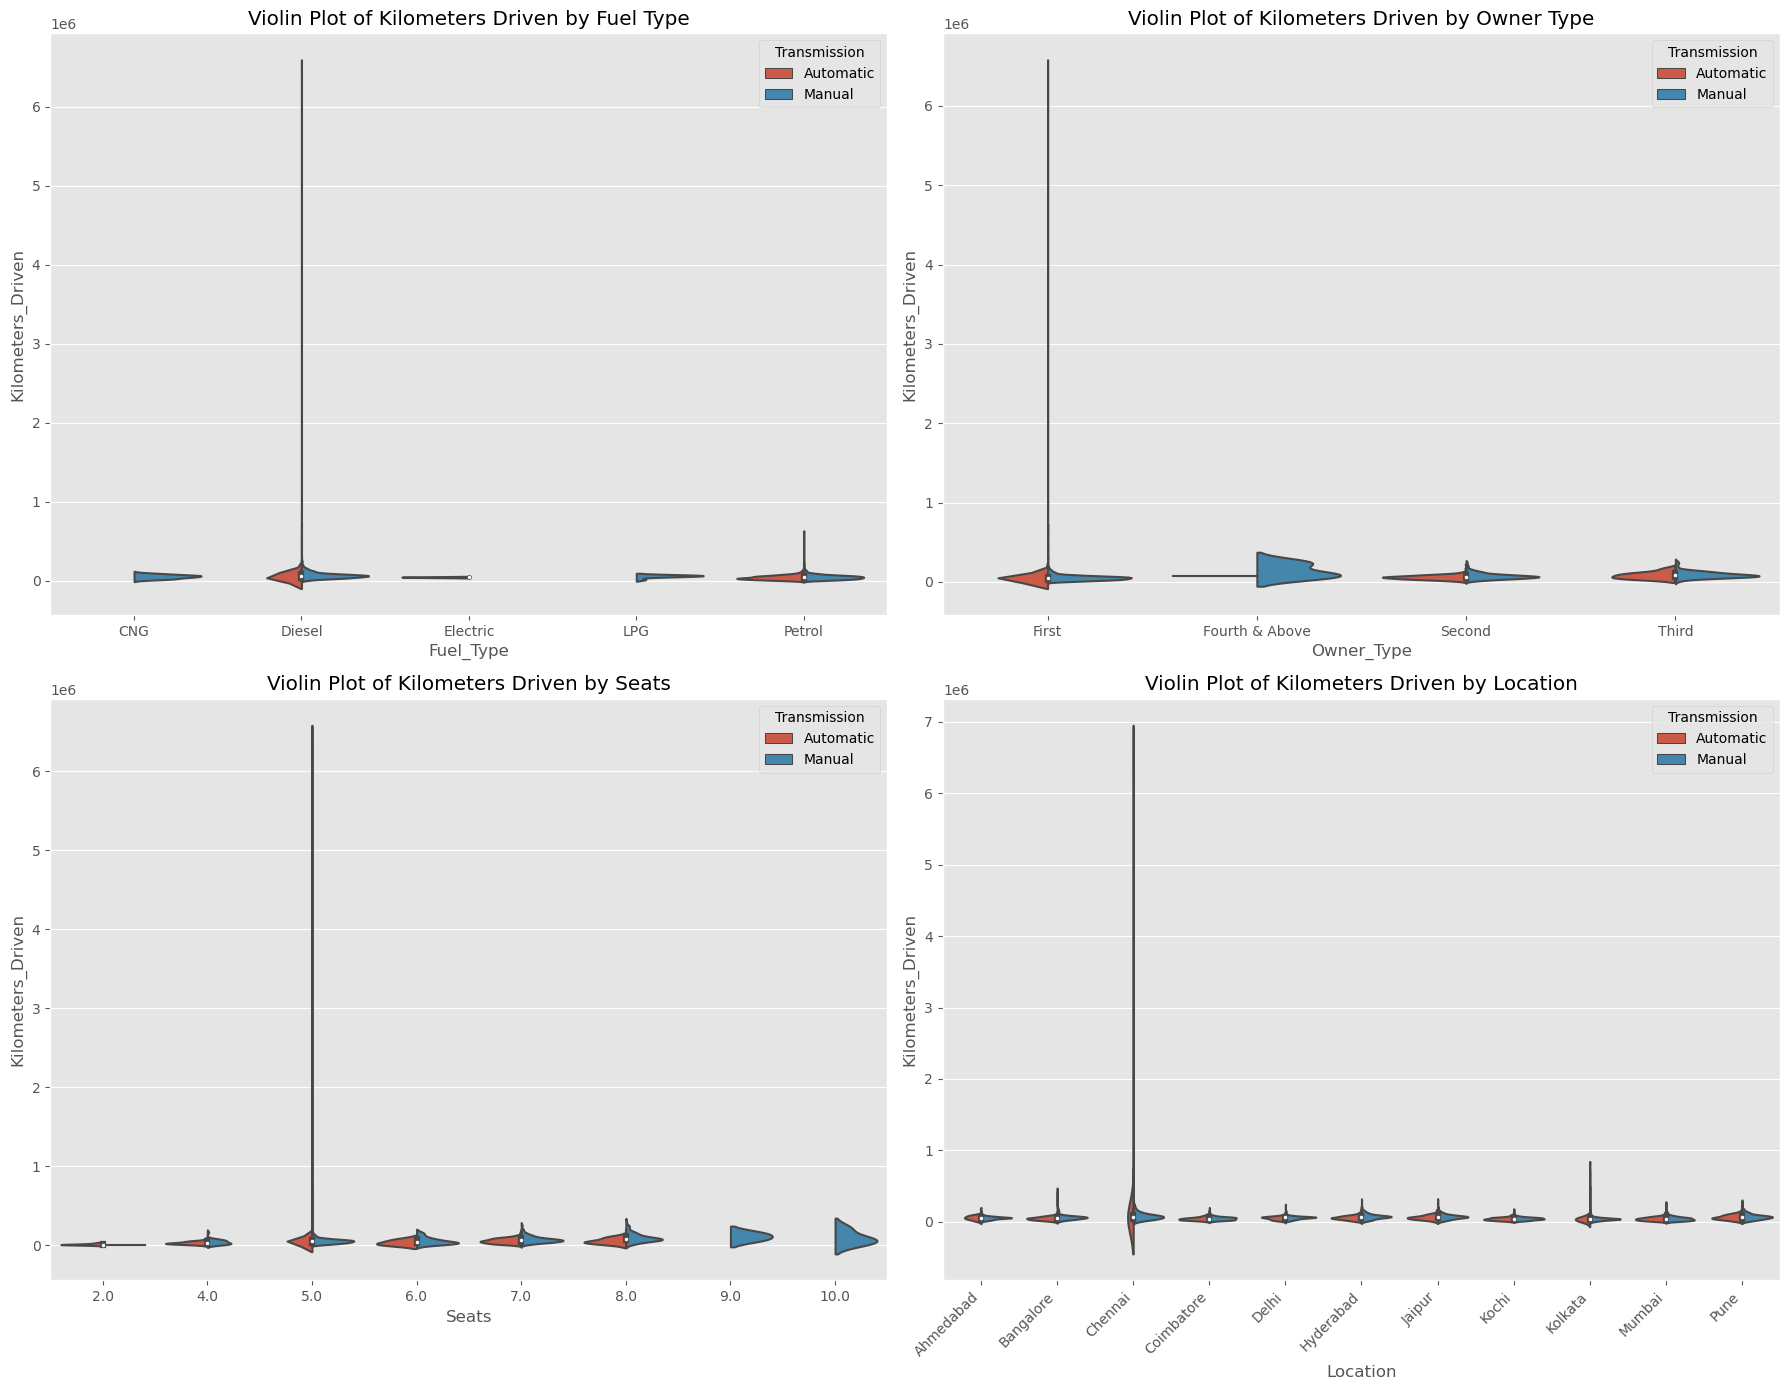

In [84]:
plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
sns.violinplot(data=cars, x="Fuel_Type", y="Kilometers_Driven", hue="Transmission", split=True)
plt.title('Violin Plot of Kilometers Driven by Fuel Type')

plt.subplot(2, 2, 2)
sns.violinplot(data=cars, x="Owner_Type", y="Kilometers_Driven", hue="Transmission", split=True)
plt.title('Violin Plot of Kilometers Driven by Owner Type')

plt.subplot(2, 2, 3)
sns.violinplot(data=cars, x="Seats", y="Kilometers_Driven", hue="Transmission", split=True)
plt.title('Violin Plot of Kilometers Driven by Seats')

plt.subplot(2, 2, 4)
sns.violinplot(data=cars, x="Location", y="Kilometers_Driven", hue="Transmission", split=True)
plt.title('Violin Plot of Kilometers Driven by Location')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<h2>Scatter Plot for price</h2>
 <h3>With respect to location</h3>

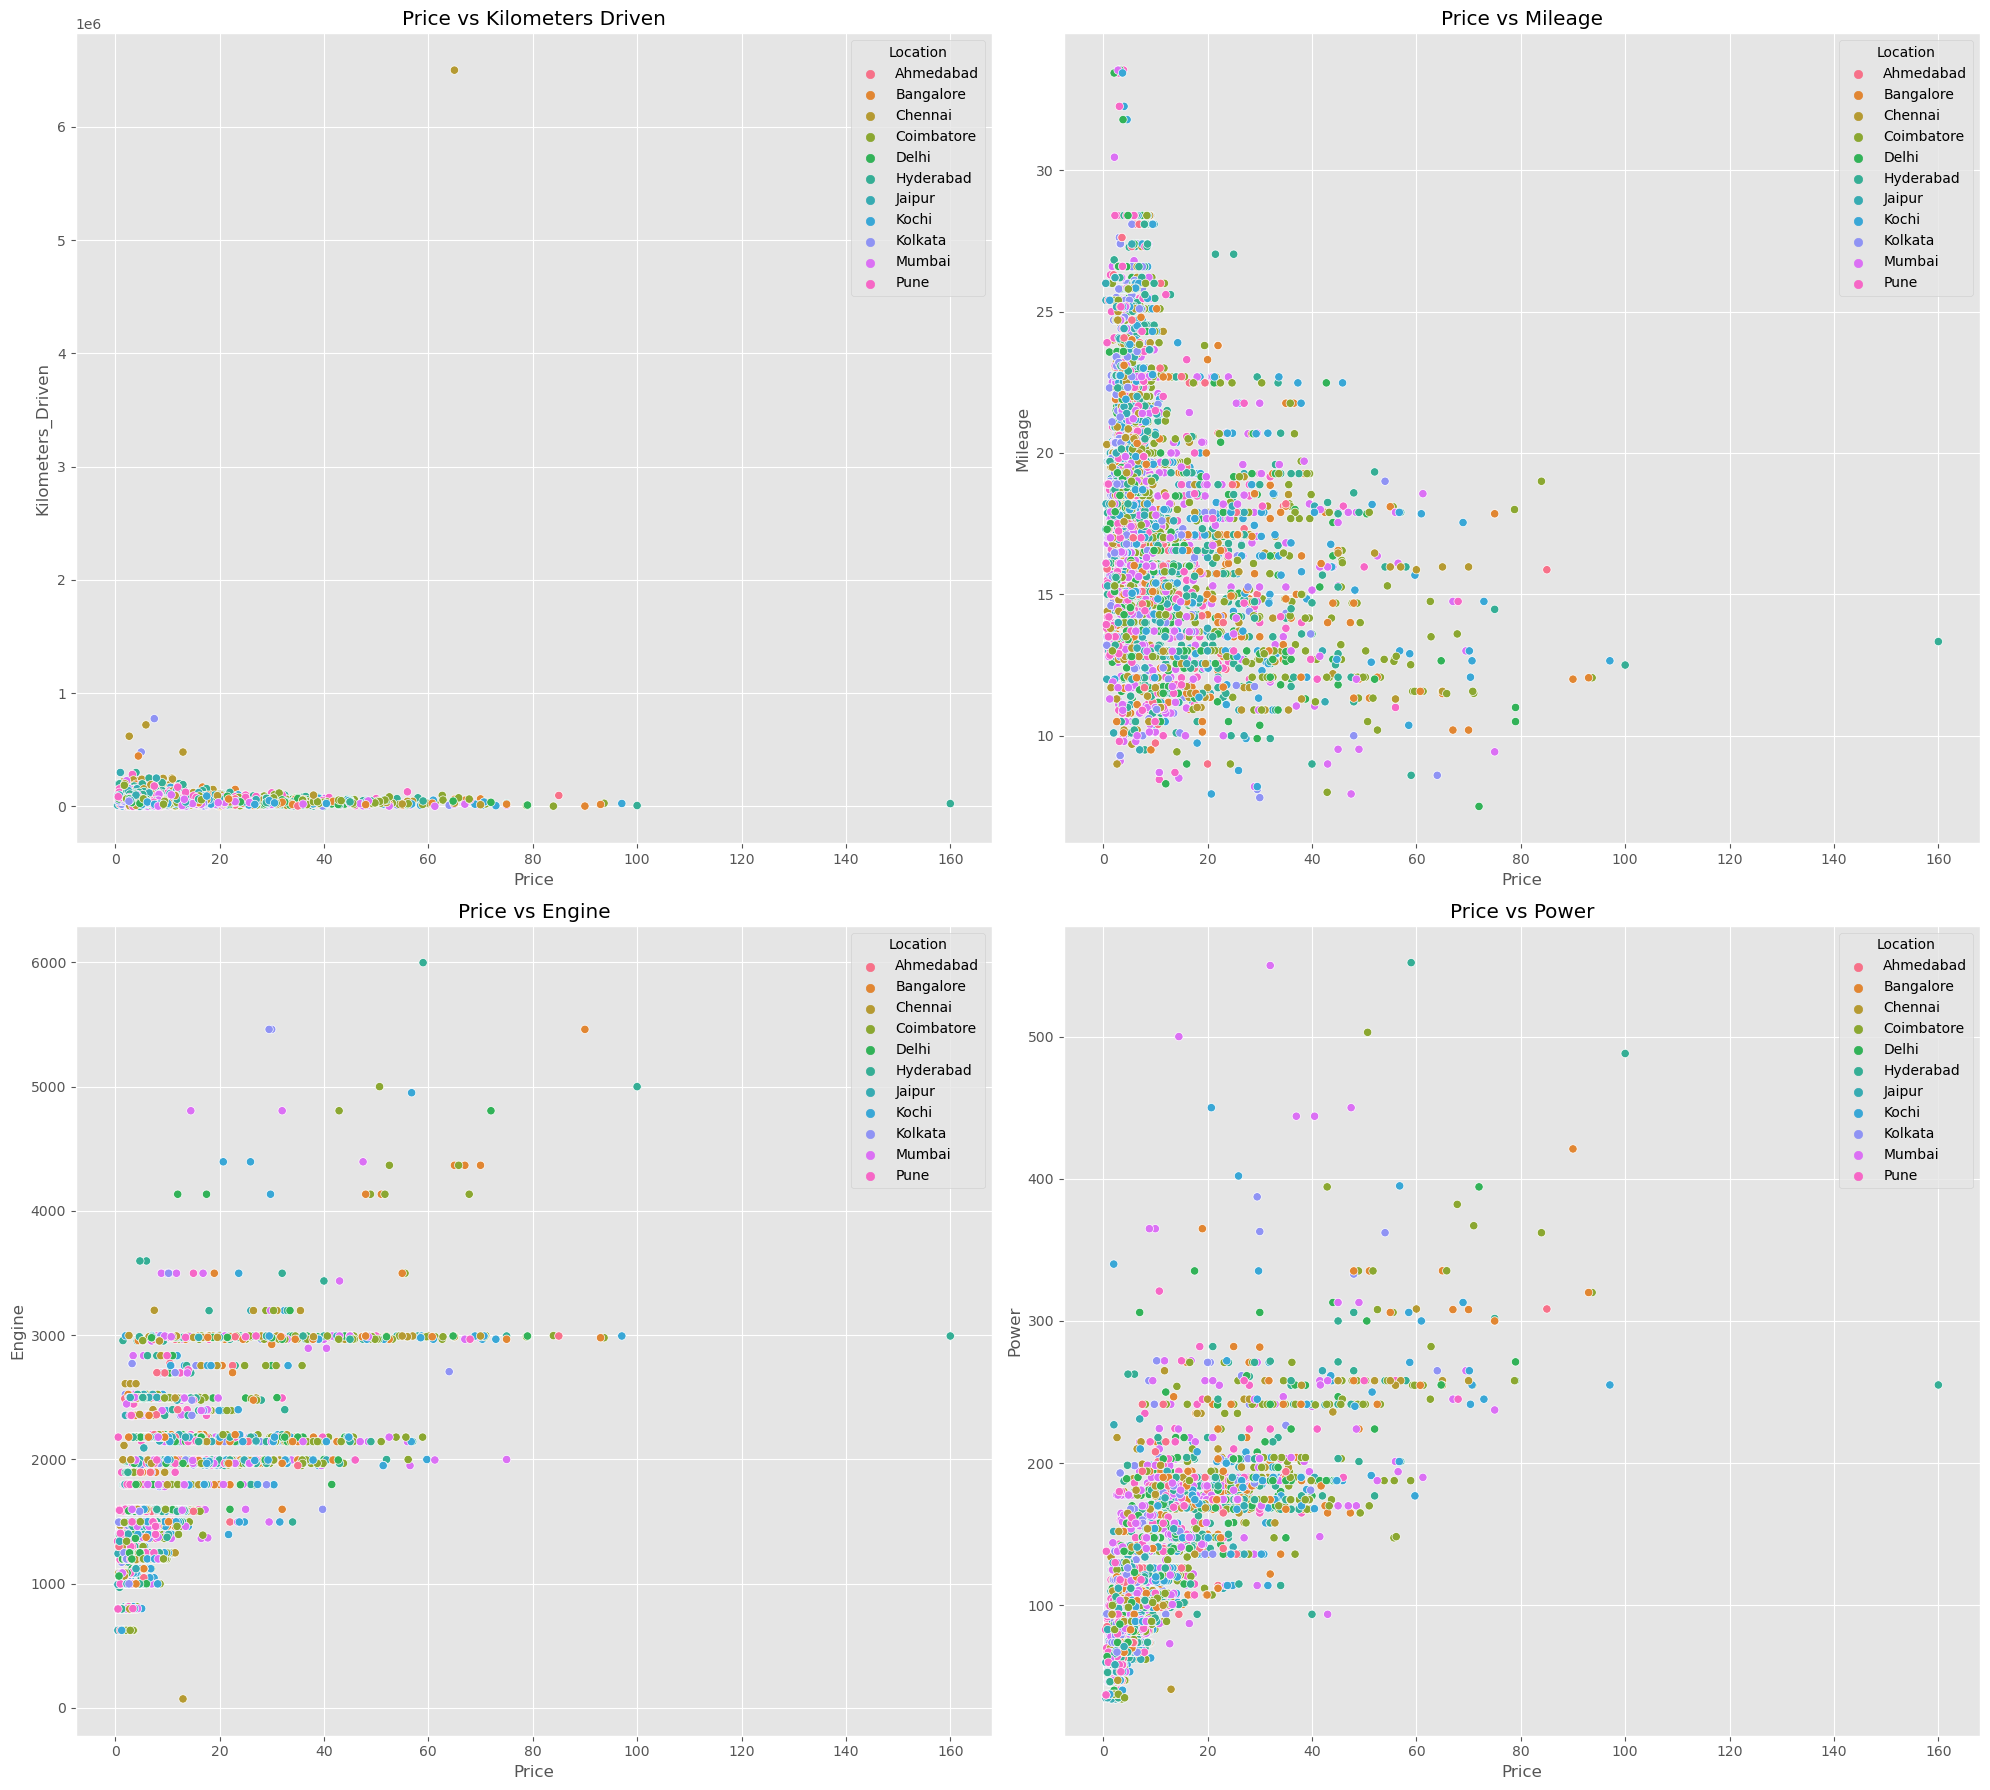

In [85]:
plt.figure(figsize=(20, 18))

plt.subplot(2, 2, 1)
sns.scatterplot(
    data=cars,
    x="Price", y="Kilometers_Driven", hue="Location"
)
plt.title('Price vs Kilometers Driven')

plt.subplot(2, 2, 2)
sns.scatterplot(
    data=cars,
    x="Price", y="Mileage", hue="Location"
)
plt.title('Price vs Mileage')

plt.subplot(2, 2, 3)
sns.scatterplot(
    data=cars,
    x="Price", y="Engine", hue="Location"
)
plt.title('Price vs Engine')

plt.subplot(2, 2, 4)
sns.scatterplot(
    data=cars,
    x="Price", y="Power", hue="Location"
)
plt.title('Price vs Power')

plt.tight_layout()
plt.show()


<h3>With respect to fuel type</h3>

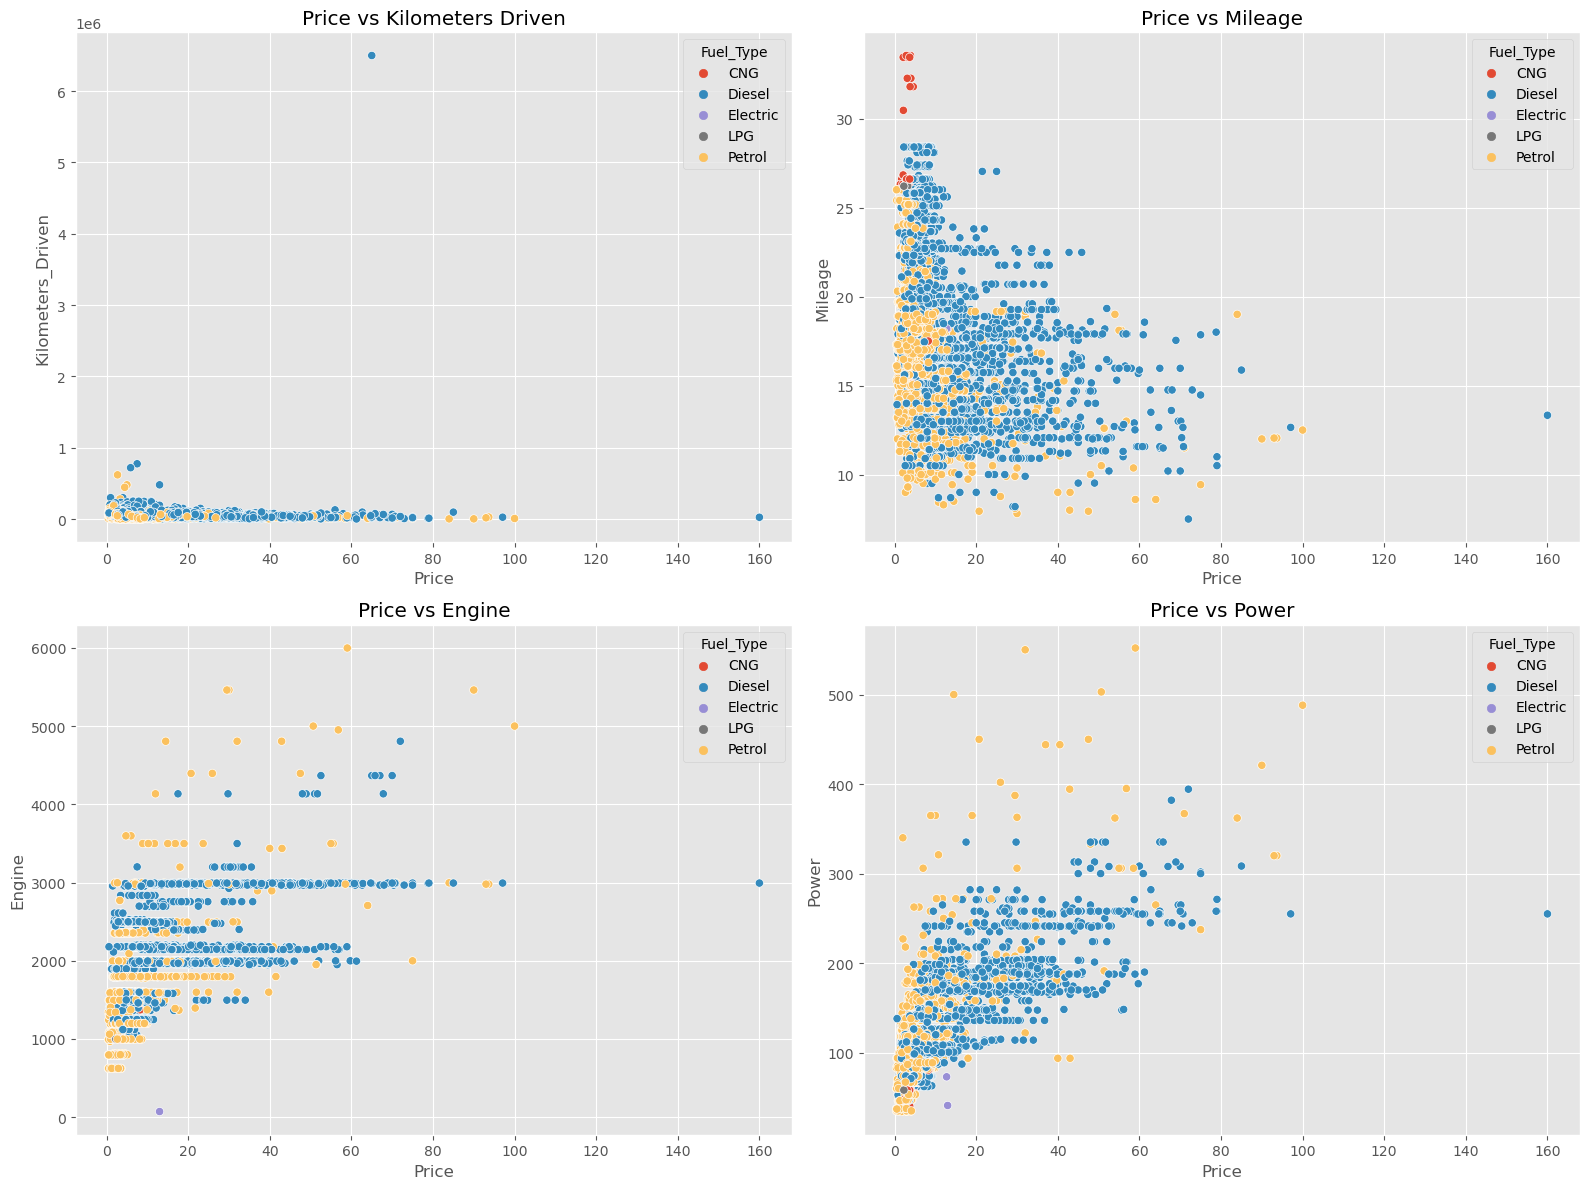

In [86]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(
    data=cars,
    x="Price", y="Kilometers_Driven", hue="Fuel_Type",
)
plt.title('Price vs Kilometers Driven')

plt.subplot(2, 2, 2)
sns.scatterplot(
    data=cars,
    x="Price", y="Mileage", hue="Fuel_Type"
)
plt.title('Price vs Mileage')

plt.subplot(2, 2, 3)
sns.scatterplot(
    data=cars,
    x="Price", y="Engine", hue="Fuel_Type"
)
plt.title('Price vs Engine')

plt.subplot(2, 2, 4)
sns.scatterplot(
    data=cars,
    x="Price", y="Power", hue="Fuel_Type"
)
plt.title('Price vs Power')

plt.tight_layout()
plt.show()


<h3>With respect to owner type</h3>

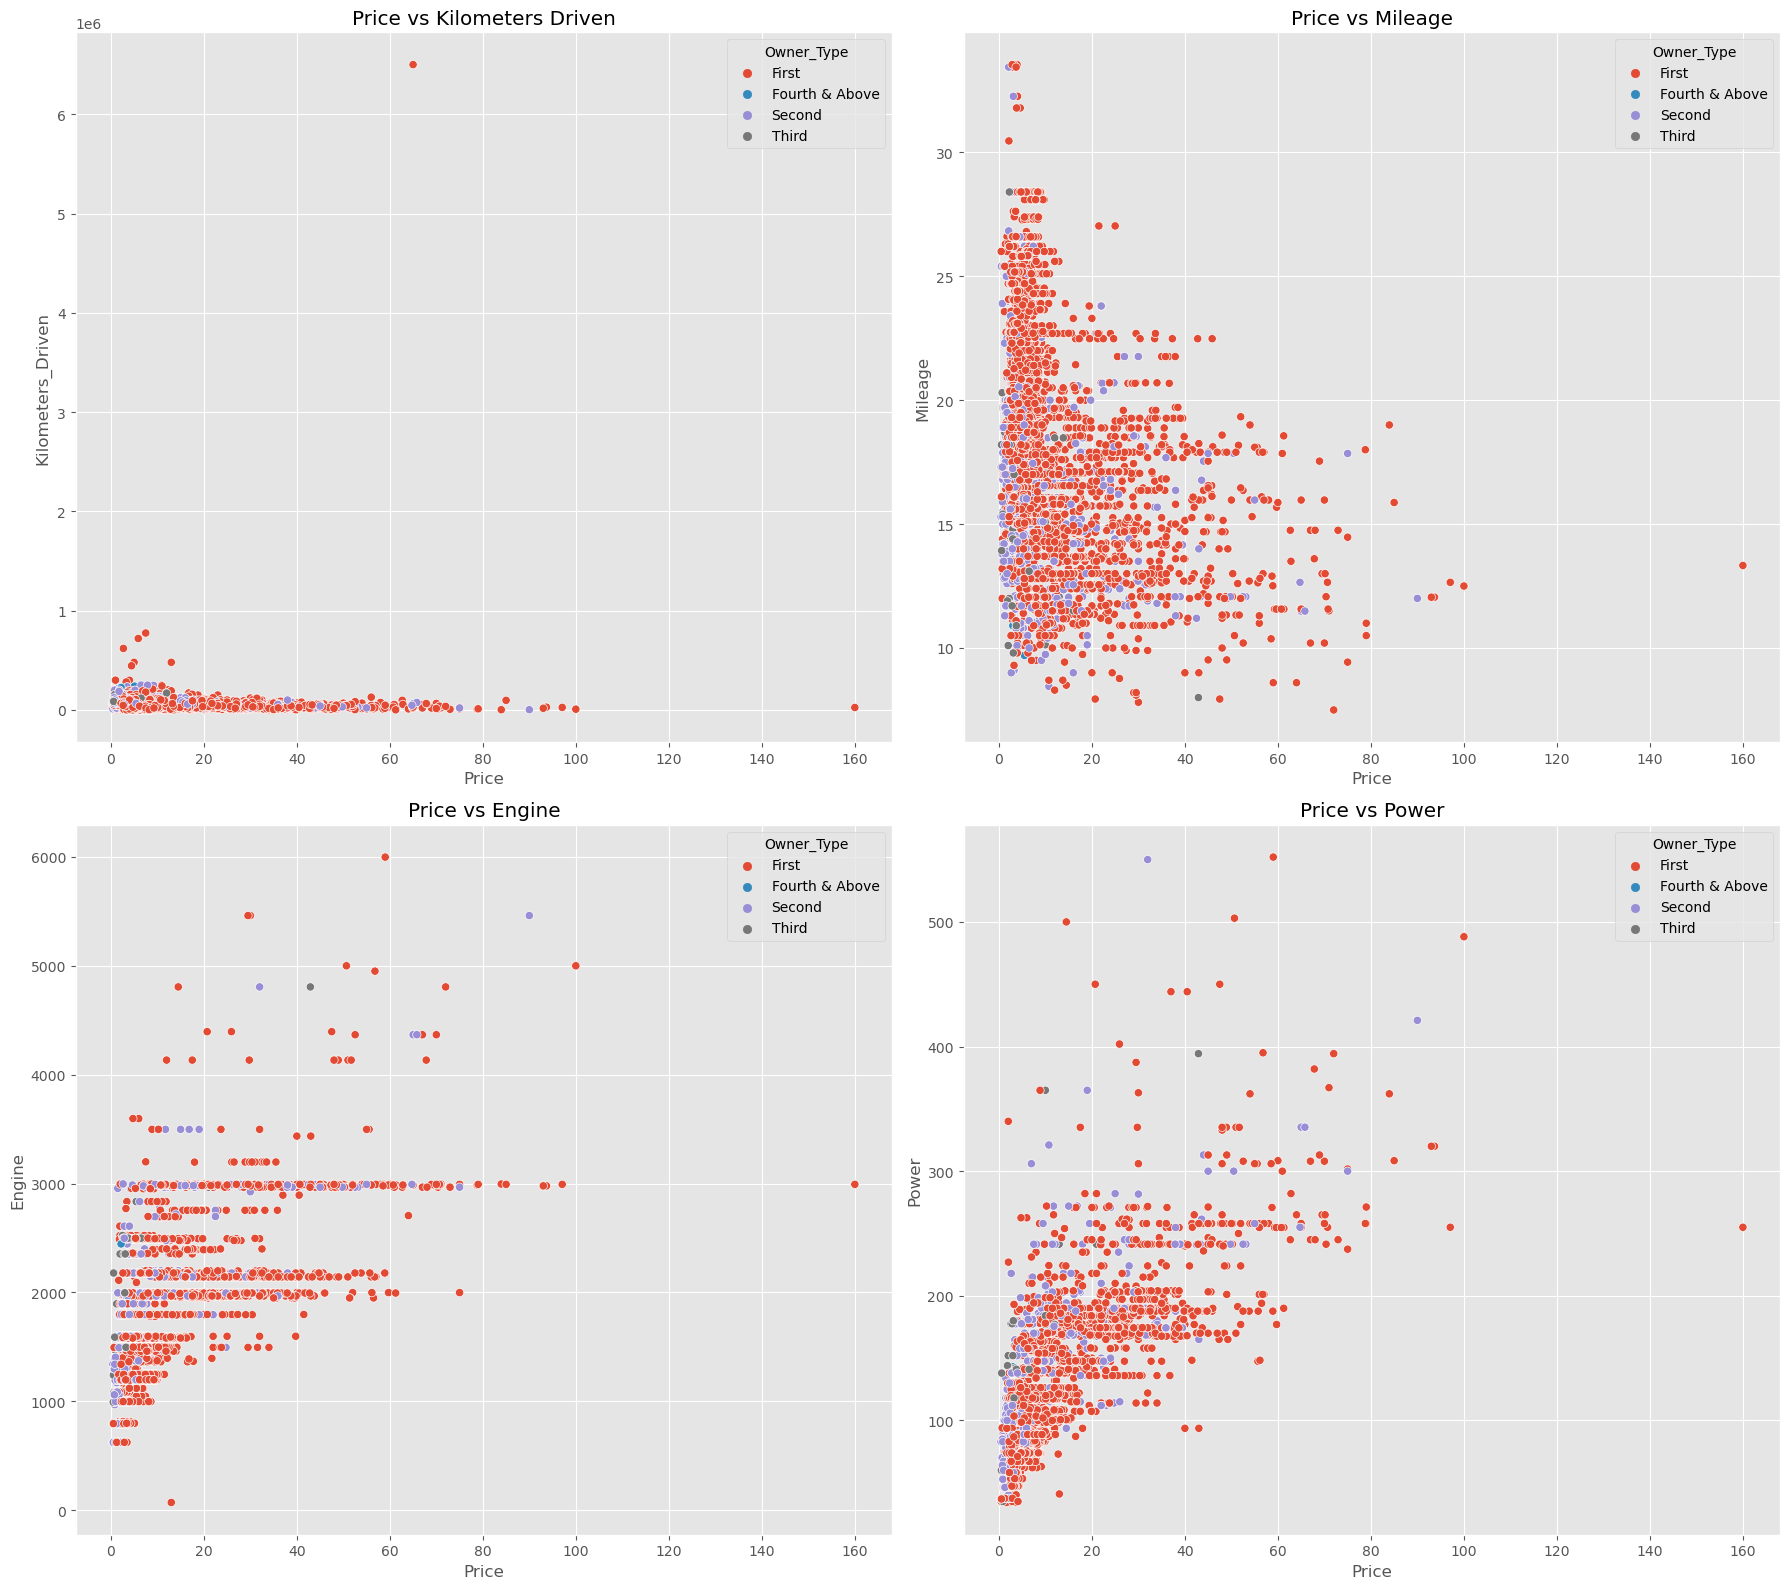

In [87]:
plt.figure(figsize=(18, 16))

plt.subplot(2, 2, 1)
sns.scatterplot(
    data=cars,
    x="Price", y="Kilometers_Driven", hue="Owner_Type"
)
plt.title('Price vs Kilometers Driven')

plt.subplot(2, 2, 2)
sns.scatterplot(
    data=cars,
    x="Price", y="Mileage", hue="Owner_Type"
)
plt.title('Price vs Mileage')

plt.subplot(2, 2, 3)
sns.scatterplot(
    data=cars,
    x="Price", y="Engine", hue="Owner_Type"
)
plt.title('Price vs Engine')

plt.subplot(2, 2, 4)
sns.scatterplot(
    data=cars,
    x="Price", y="Power", hue="Owner_Type"
)
plt.title('Price vs Power')

plt.tight_layout()
plt.show()


<h2> Inferences -</h2><br>
<p style = "font-size: 20px">Price do not much depend on Kilometers driven, with few outliers of lower price when kilometer driven is large.<br><br>
Price and mileage has a negative correlation<br><br>
Price and Engine/ Power has a positive correlation<br></p><br>

<h1>Cumulative Distribution</h1>
<h2>Owner type</h2>

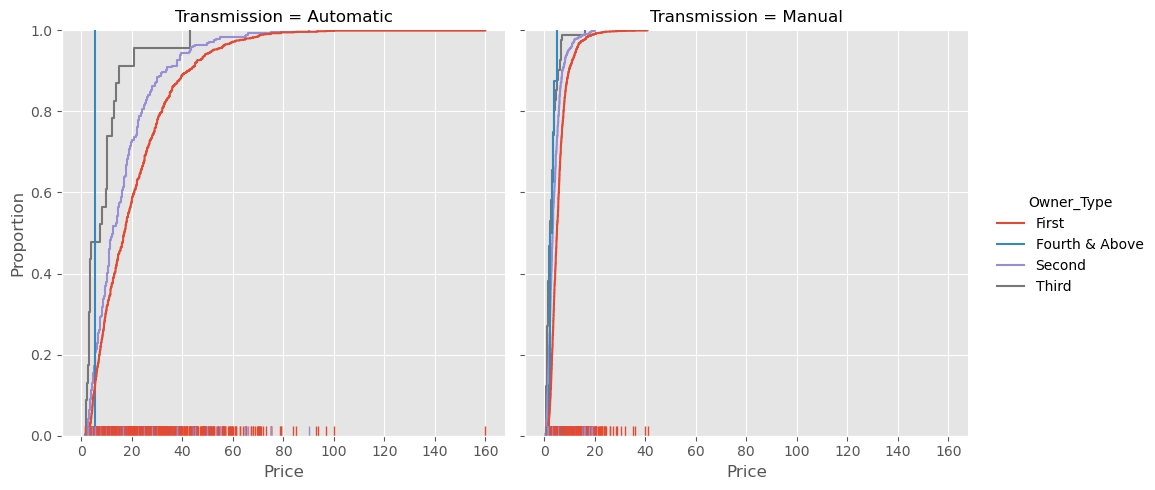

In [88]:
sns.displot(data=cars, kind="ecdf", x="Price", col="Transmission", hue="Owner_Type", rug=True)

<h2> Inferences -</h2><br>
<p style= "font-size: 18px">For Manual Transmission, irrespective of owner type and fuel type, Price is similarly distributed.<br><br>
While for Automatic Transmission, there is a visible difference in distribution of price for each owner type fuel type</p><br>

<h1>KDE Plots</h1>
<h2>With respect to Location</h2>

<Axes: xlabel='Power', ylabel='Density'>

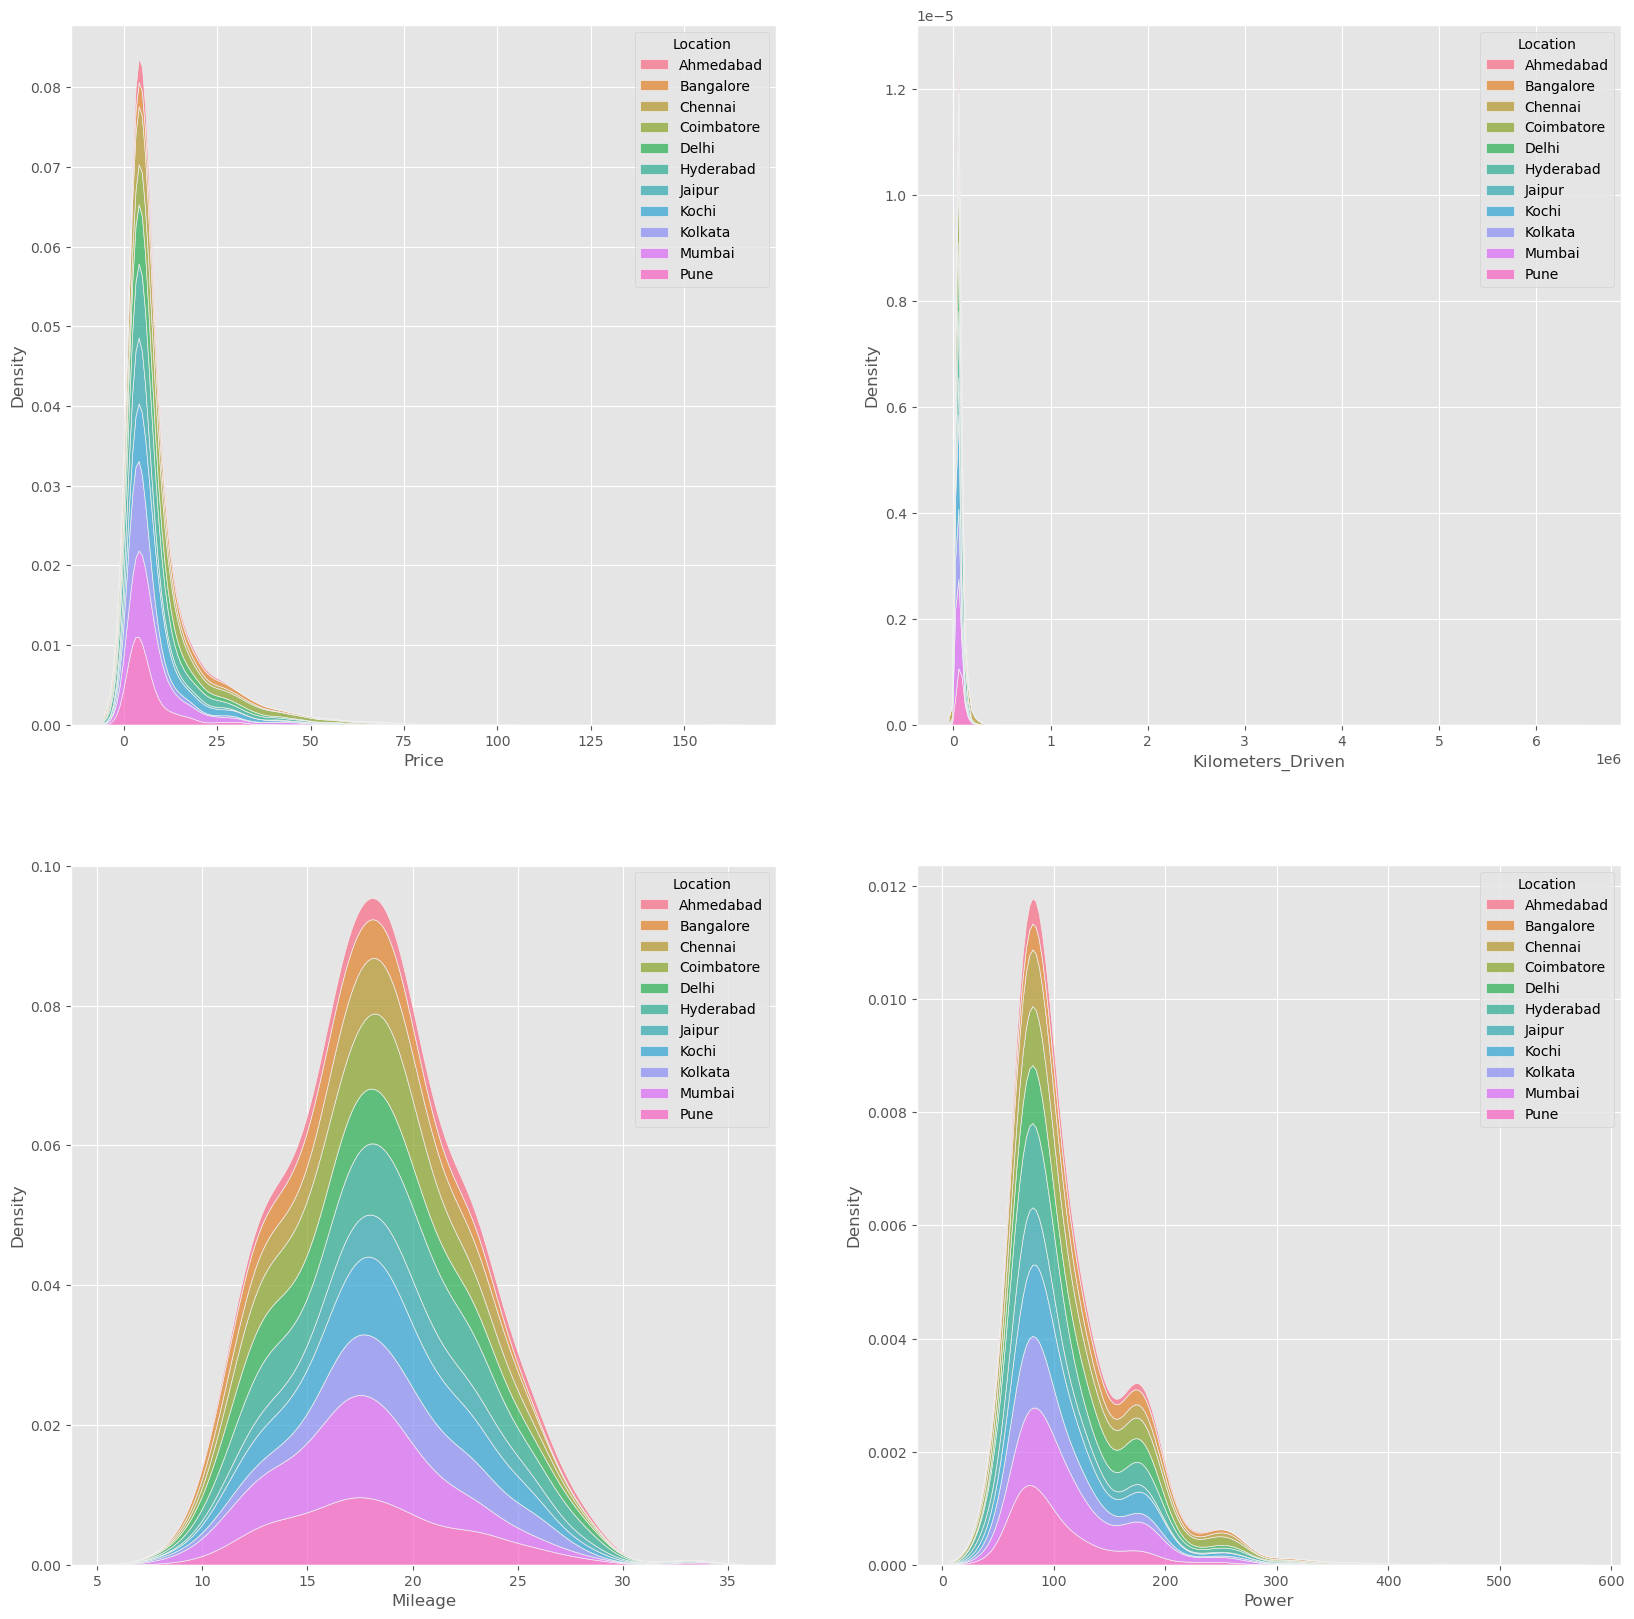

In [89]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.kdeplot(data= cars, x="Price", hue="Location", multiple="stack")

plt.subplot(2, 2, 2)
sns.kdeplot(data= cars, x="Kilometers_Driven", hue="Location", multiple="stack")

plt.subplot(2, 2, 3)
sns.kdeplot(data= cars, x="Mileage", hue="Location", multiple="stack")

plt.subplot(2, 2, 4)
sns.kdeplot(data= cars, x="Power", hue="Location", multiple="stack")

<h2>With respect to Owner type</h2>

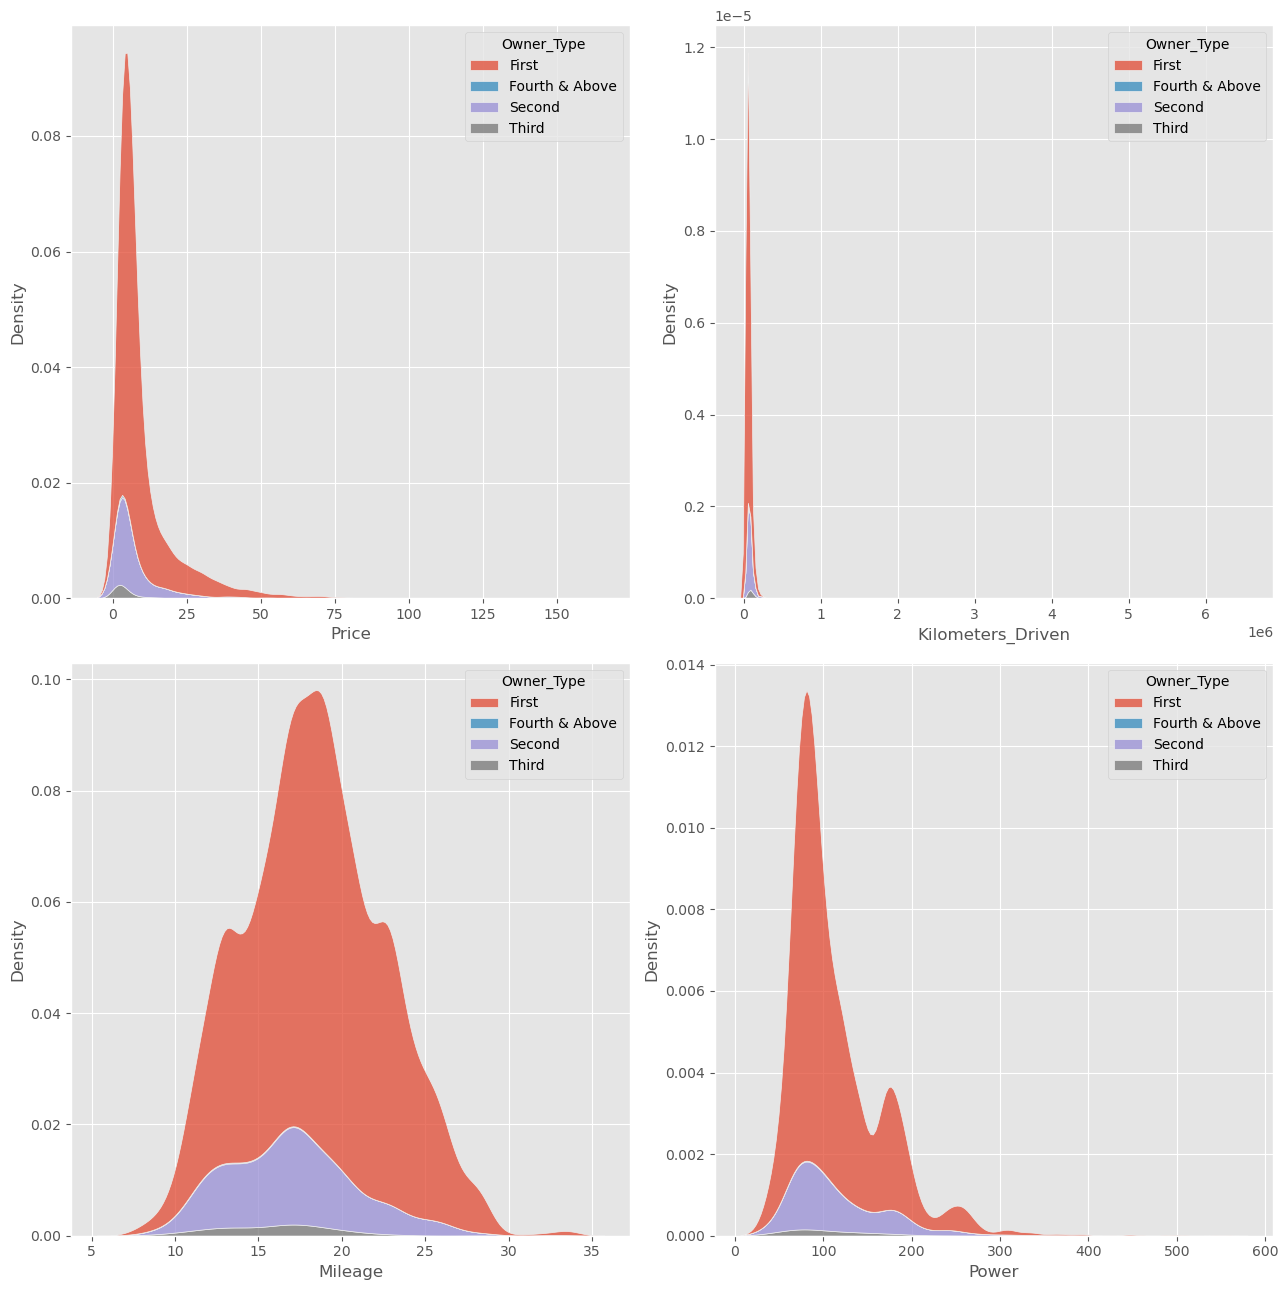

In [90]:
plt.figure(figsize=(13, 13))

plt.subplot(2, 2, 1)
sns.kdeplot(data=cars, x="Price", hue="Owner_Type", multiple="stack")

plt.subplot(2, 2, 2)
sns.kdeplot(data=cars, x="Kilometers_Driven", hue="Owner_Type", multiple="stack")

plt.subplot(2, 2, 3)
sns.kdeplot(data=cars, x="Mileage", hue="Owner_Type", multiple="stack")

plt.subplot(2, 2, 4)
sns.kdeplot(data=cars, x="Power", hue="Owner_Type", multiple="stack")

plt.tight_layout()
plt.show()


<h2>With respect to Fuel type</h2>

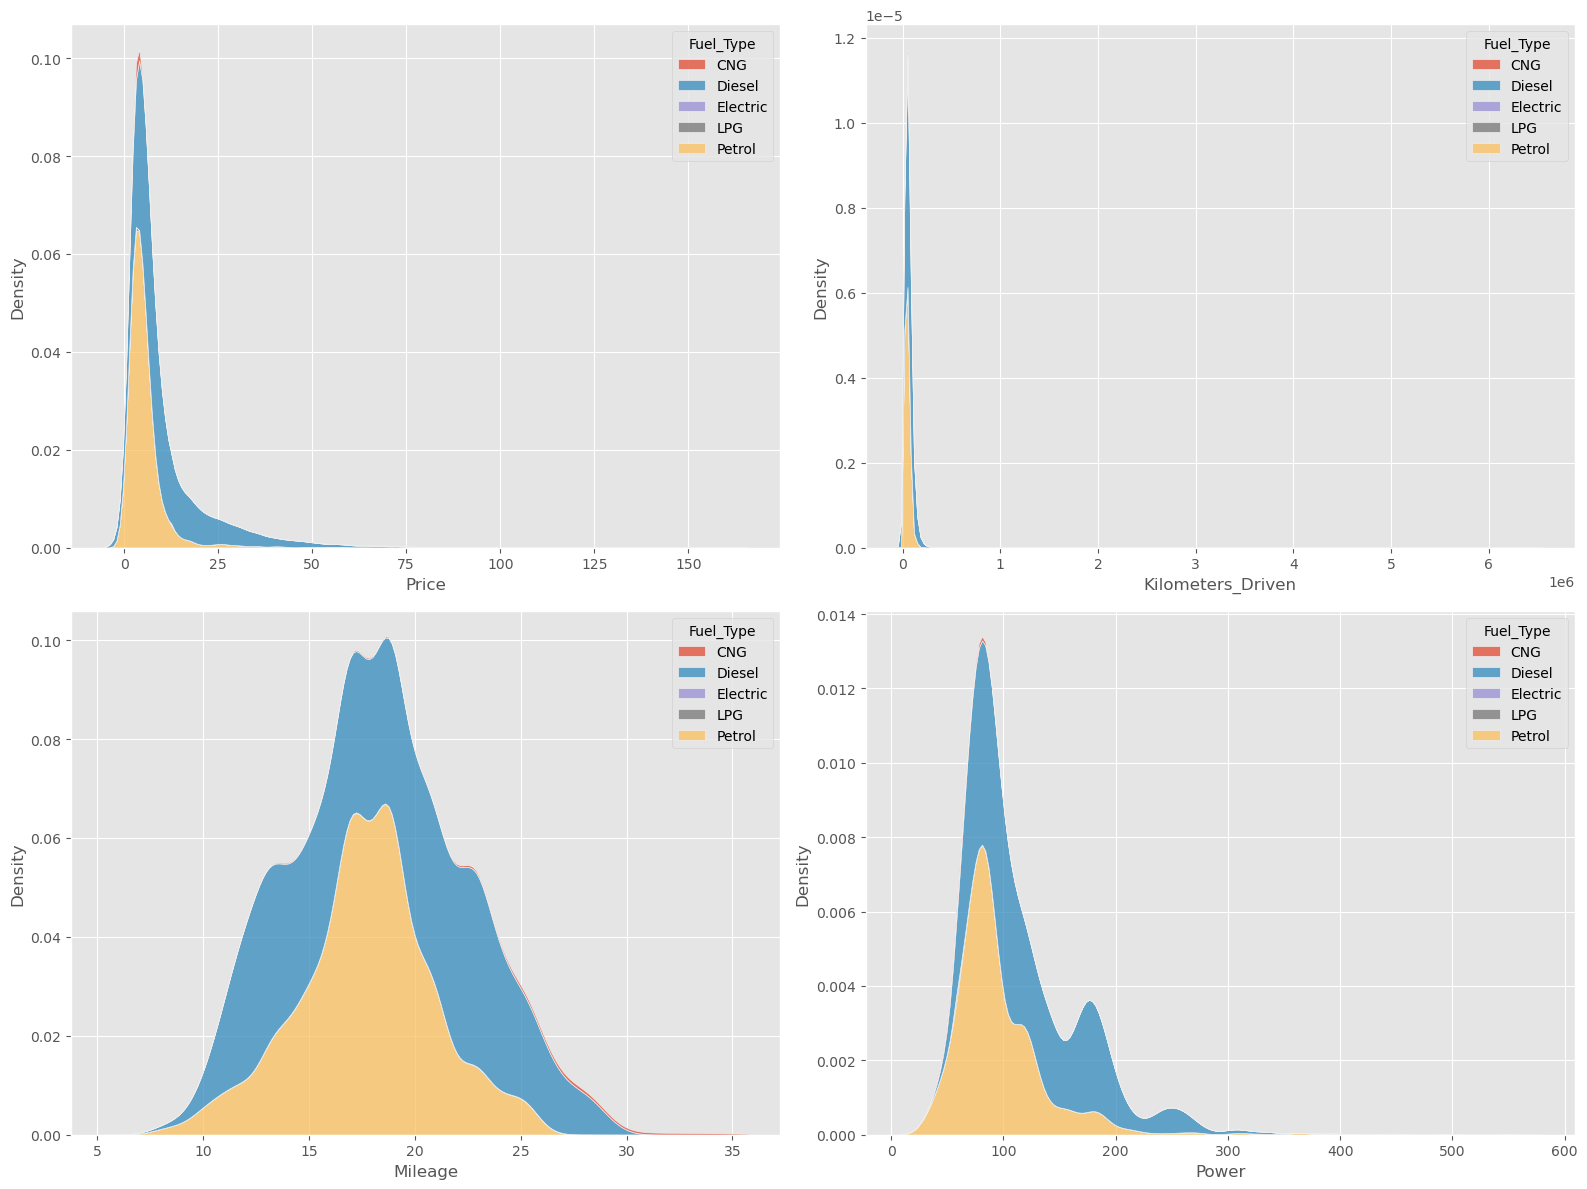

In [91]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.kdeplot(data=cars, x="Price", hue="Fuel_Type", multiple="stack")

plt.subplot(2, 2, 2)
sns.kdeplot(data=cars, x="Kilometers_Driven", hue="Fuel_Type", multiple="stack")

plt.subplot(2, 2, 3)
sns.kdeplot(data=cars, x="Mileage", hue="Fuel_Type", multiple="stack")

plt.subplot(2, 2, 4)
sns.kdeplot(data=cars, x="Power", hue="Fuel_Type", multiple="stack")

plt.tight_layout()
plt.show()


<h2> Inferences -</h2>
<p style="font-size:18px">Distribution for Price is a little bit Right Skewed.<br><br>
Distribution for Kilometers Driven is very thin so most of the cars were driven similar kilometers<br><br>
Distribution for Mileage is a approximately normally distributed<br><br>
Distribution for Power is a little bit Right Skewed</p><br><br>

<h1>DISTRIBUTION OF CAR PRICES IN DIFFERENT CITIES</h1>

In [92]:
def plotter(Location, ax=None):

    prices = cars[cars['Location'] == Location]['Price'].dropna()
    mean = prices.sum() / len(prices)
    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = plt.gca() 
    ax.hist(prices, bins=100, color='b', edgecolor='k', alpha=0.7)
    ax.axvline(x=mean, color='r', label='Mean Price in ' + Location)
    ax.set_title('Price Distribution in ' + Location)
    ax.set_xlabel('Price (Lakh)')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.legend()

    print('Mean Price in ' + Location + ' : ' + str(round(mean, 2)) + ' Lakh')

Mean Price in Mumbai : 9.53 Lakh
Mean Price in Pune : 6.87 Lakh
Mean Price in Chennai : 7.9 Lakh
Mean Price in Coimbatore : 15.26 Lakh
Mean Price in Hyderabad : 9.85 Lakh
Mean Price in Jaipur : 5.89 Lakh
Mean Price in Kochi : 11.37 Lakh
Mean Price in Kolkata : 5.77 Lakh
Mean Price in Delhi : 9.55 Lakh
Mean Price in Bangalore : 13.52 Lakh
Mean Price in Ahmedabad : 8.5 Lakh


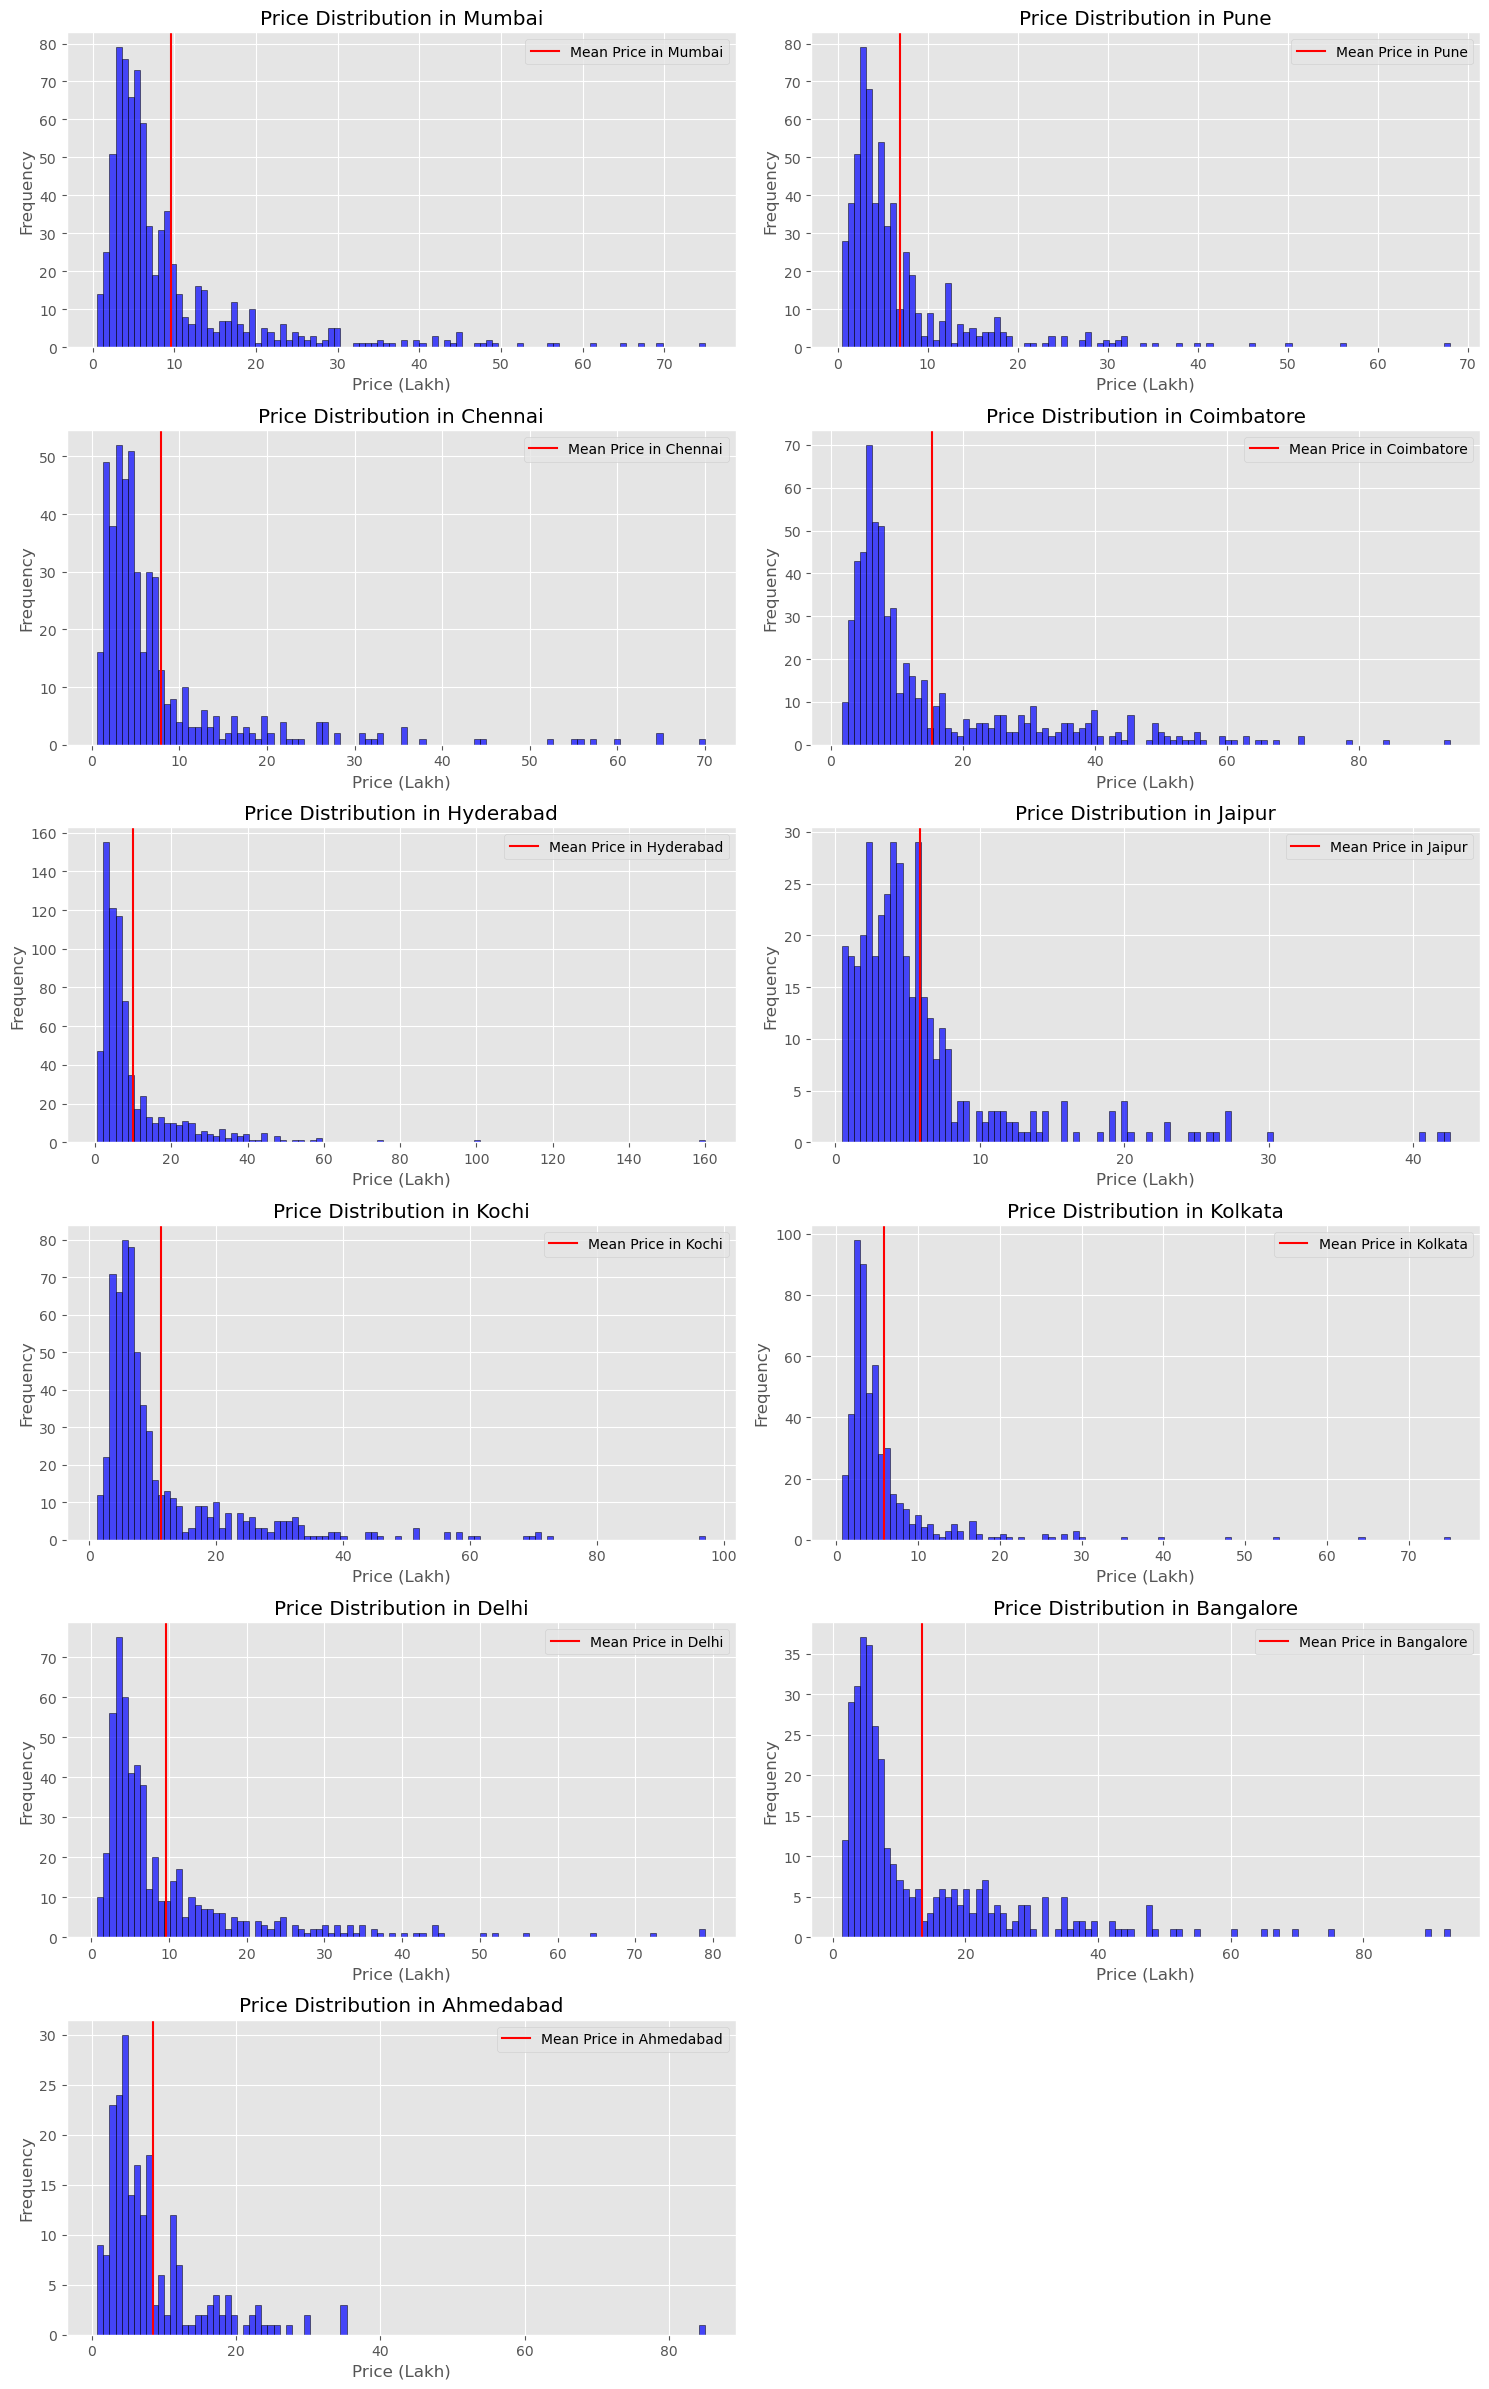

In [93]:
fig, axes = plt.subplots(6, 2, figsize=(15, 24))

locations = ['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']
for i in range(len(locations)):
    row, col = i // 2, i % 2
    plotter(locations[i], ax=axes[row, col])
fig.delaxes(axes.flatten()[len(locations)])
plt.tight_layout()
plt.show()

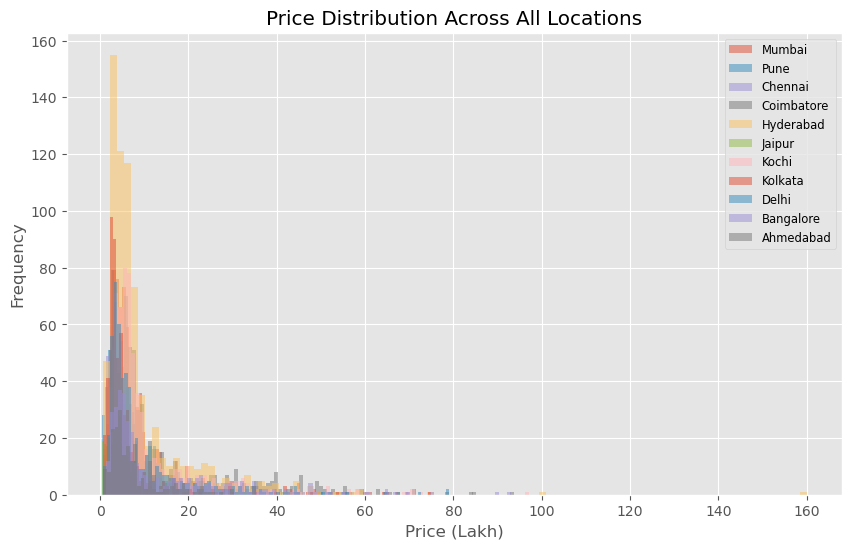

In [94]:
plt.figure(figsize=(10, 6))
for location in locations:
    prices = cars[cars['Location'] == location]['Price'].dropna()
    plt.hist(prices, bins=100, alpha=0.5, label=location)

plt.title('Price Distribution Across All Locations')
plt.xlabel('Price (Lakh)')
plt.ylabel('Frequency')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

Distrubtions are right skewed , using Log transform can help in normalization

In [95]:
def Perform_log_transform(dataframe,col_log):
    for colname in col_log:
        dataframe[colname + '_log'] = np.log(dataframe[colname])
    #dataframe.drop(col_log, axis=1, inplace=True)
    dataframe.info()

In [96]:
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 5892 entries, 0 to 5671
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   5892 non-null   object  
 1   Location               5892 non-null   category
 2   Year                   5892 non-null   int64   
 3   Kilometers_Driven      5892 non-null   int64   
 4   Fuel_Type              5892 non-null   category
 5   Transmission           5892 non-null   category
 6   Owner_Type             5892 non-null   category
 7   Mileage                5892 non-null   float64 
 8   Engine                 5892 non-null   float64 
 9   Power                  5892 non-null   float64 
 10  Seats                  5892 non-null   float64 
 11  Price                  5892 non-null   float64 
 12  new_price_num          5892 non-null   float64 
 13  Ageofcar               5892 non-null   int64   
 14  Brand                  5892 non-null   catego

In [97]:
cars.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

# Model Building

In [98]:
X = cars.drop(["Price", "Price_log"], axis=1)
y = cars[["Price_log", "Price"]]

### Creating dummy variables

In [99]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [100]:
X = encode_cat_vars(X)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,72000,26.60000,998.00000,58.16000,5.00000,14,11.18442,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,41000,19.67000,1582.00000,126.20000,5.00000,9,10.62133,False,False,False,...,False,True,True,False,False,False,True,False,False,False
3145,45000,16.70000,1198.00000,88.80000,5.00000,14,10.71442,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,87000,20.77000,1248.00000,88.76000,7.00000,12,11.37366,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,40670,15.20000,1968.00000,140.80000,5.00000,11,10.61325,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4124, 25)
X_test: (1768, 25)
y_train: (4124, 2)
y_test: (1768, 2)


In [102]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

X_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()

X_train = X_train.astype(float)
y_train = y_train.astype(float)

olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1230.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        15:38:30   Log-Likelihood:                -846.49
No. Observations:                4124   AIC:                             1745.
Df Residuals:                    4098   BIC:                             1909.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 89% 

In [103]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets)  *100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)  # High Overfitting.

    Data    RMSE     MAE     MAPE
0  Train 7.29578 2.49100 24.01031
1   Test 5.43112 2.35854 22.60179


   
 Root Mean Squared Error of train and test data is not  different, indicating that our model is not overfitting the train data.
    
 Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 2.5 lakhs on test data.
    
 The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.
    
 Mean Absolute Percentage Error is ~23% on the test data.

In [104]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)
olsmodel2= build_ols_model(X_train1)
print(olsmodel2.summary())
# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1269.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        15:38:30   Log-Likelihood:                -865.27
No. Observations:                4124   AIC:                             1781.
Df Residuals:                    4099   BIC:                             1939.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observations from the model



    
 It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.

1. With our linear regression model we have been able to capture ~89 variation in our data.
<br>
    
2. The model indicates that the most significant predictors of price of used cars are - 
    - Age of the car
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - OwnerType
    - Transmission - Automatic/Manual

<br>        
3. Newer cars sell for higher prices. 1 unit increase in age  of the car leads to [ exp(0.1123) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.

<h1>Hypothesis Testing</h1><br>
<h2>Using t-test hypothesis</h2>
<p style="font-size: 20px">
Null Hypothesis : The average mileage of diesel cars is equal to the average mileage of petrol cars.<br><br>
<b>H<sub>o</sub> : µ<sub>d</sub> −µ<sub>p</sub> = 0</b><br><br>
Alternative Hypothesis : The average mileage of diesel cars is not equal to the average mileage of petrol cars.<br><br>
<b>H<sub>1</sub> : µ<sub>d</sub> −µ<sub>p</sub> ≠0</b><br><br>
µ<sub>d</sub>= Average mileage of diesel cars<br><br>
µ<sub>p</sub>= Average mileage of petrol cars<br><br>
Level of Significance = α = 0.05

In [105]:
# Segeragating diesel and petrol cars data set.
petrol_cars = cars[cars['Fuel_Type'] == 'Petrol']
diesel_cars = cars[cars['Fuel_Type'] == 'Diesel']


In [106]:
# taking samples from the data set for diesel and petrol car.
petrol_cars_sam = petrol_cars.sample(500)
diesel_cars_sam = diesel_cars.sample(1000)

In [107]:
# Calculating mean and standard deviation.
mean_p = np.mean(petrol_cars_sam['Mileage'])
mean_d = np.mean(diesel_cars_sam['Mileage'])
std_p = np.std(petrol_cars_sam['Mileage'], ddof=1)
std_d = np.std(diesel_cars_sam['Mileage'], ddof=1)

In [112]:
n1 = len(petrol_cars_sam)
n2 = len(diesel_cars_sam)
std_stn = np.sqrt(((n1 - 1) * std_p ** 2 + (n2 - 1) * std_d ** 2) / (n1 + n2 - 2))
t_stat = (mean_p - mean_d) / (std_stn * np.sqrt(1/n1 + 1/n2))
df = n1 + n2 - 2
# p_value = 1 - stats.t.cdataframe(abs(t_stat), dataframe)
p_value = 1 - stats.t.cdf(abs(t_stat), df)


In [113]:
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -4.597833128917258
p-value: 2.314111278378661e-06


- In hypothesis testing, the p-value represents the probability of obtaining results as extreme as the observed results, assuming that the null hypothesis is true. In this case, the null hypothesis typically states that there is no difference in the mean mileage between petrol and diesel cars.

- With a low p-value (less than a significance level 0.05), we reject the null hypothesis. This suggests that there is evidence to support that there is a statistically significant difference in the mean mileage between petrol and diesel cars.

- The negative t-statistic indicates that, on average, the mileage of petrol cars is lower than that of diesel cars in your sample.

In [110]:
cars

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Kilometers_Driven_log,Price_log
S.No.,,,,,,,,,,,,,
0,Mumbai,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,1.75000,14,11.18442,0.55962
1,Pune,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,12.50000,9,10.62133,2.52573
3145,Kolkata,45000,Petrol,Manual,First,16.70000,1198.00000,88.80000,5.00000,1.99000,14,10.71442,0.68813
3,Chennai,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,6.00000,12,11.37366,1.79176
4,Coimbatore,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,17.74000,11,10.61325,2.87582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Kochi,38593,Petrol,Manual,First,18.70000,1199.00000,88.70000,5.00000,6.17000,6,10.56083,1.81970
1615,Kochi,18664,Petrol,Manual,First,18.70000,1199.00000,88.70000,5.00000,7.56000,6,9.83435,2.02287
3403,Coimbatore,12794,Petrol,Automatic,First,19.00000,1199.00000,88.70000,5.00000,9.15000,6,9.45673,2.21375
